<table>
<tr>    
<td style="text-align: center">
<h1>Introduction to Optimization, Regularization, Generalization,<br />and dealing with Underfitting and Overfitting</h1>
<h2><a href="http://home.agh.edu.pl/~horzyk/index.php">Adrian Horzyk</a></h2>
</td> 
<td>
<img src="http://home.agh.edu.pl/~horzyk/im/AdrianHorzyk49BT140h.png" alt="Adrian Horzyk, Professor" title="Adrian Horzyk, Professor" />        
</td> 
</tr>
</table>
<h3><i>Welcome to the interactive lecture and exercises where you can check everything by yourself and experiment!</i></h3>

# Optimization of the Network Models

Optimizing the developed models is a normal process for every issue we want to solve using computational intelligence methods. Most of the methods and algorithms require the developer's participation in creating the final model. This process encompasses the use of various optimization and regularization methods, data preparation, generation and augmentation, experiments with different network structures and setting up appropriate hyperparameters.

# Underfitting and Overfitting Issues

As we experienced in the previous examples (movie review sentiment prediction, topic classification, and house price regression), we could notice that the performance of our models on the validation data would always peak after a few epochs and would then start degrading, i.e. our model would quickly start to <b>overfit</b> (the <b>variance</b> of the model has risen). Sometimes we also had problems with the achievement of good enough training performance (the <b>bias</b> of the model), when we did not achieved enough high accuraccy or enough small loss, which we call the <b>underfitting</b> problem.

Underfitting and overfitting can happen in every single machine learning problem. Learning how to deal with underfitting and overfitting is essential to mastering machine learning and computational intelligence.

The fundamental issue in machine learning is the tension between optimization and generalization:
* <b>Optimization</b> refers to the process of adjusting a model to get the best performance possible on the training data (low <b>bias</b> of learning).
* <b>Generalization</b> refers to how well the trained model would perform on (test and new) data it has never seen before (low <b>variance</b> of learning).

The goal is to get both good adjustement of the model to the training data and good generalization.

At the beginning of training, optimization and generalization are correlated: the lower your loss on training data, the lower your loss on test data. While this is happening, your model is said to be <b>underfit</b>, i.e., there is still progress to be made because the network has not yet modeled all relevant patterns in the training data. But after a certain number of iterations on the training data, generalization stops improving, validation metrics stall, and then start degrading: the model is starting to <b>overfit</b>, i.e. is it starting to learn patterns that are specific to the training data but that are misleading or irrelevant when it comes to new (test) data, or we say that the model learns by heart.

To prevent a model from learning misleading or irrelevant patterns found in the training data, we can peform a few actions:
* train the model using more training data because then a model will naturally generalize better;
* adapt the quantity of information that your model is allowed to store, or to add constraints on what information it is allowed to store because if a network can only afford to memorize a small number of patterns, the optimization process will force it to focus on the most essential patterns, which have a better chance of generalizing well;
* use other regularization methods like dropout.

The processing of fighting overfitting is called <b>regularization</b>. Let's review some of the most common regularization techniques, and let's apply them in practice to improve our movie classification model.

In [1]:
import numpy as np
import tensorflow as tf
import keras

print ("TensorFlow version: " + tf.__version__)
print ("Keras version: " + keras.__version__)

from keras import models
from keras import layers

2024-03-27 23:37:56.261031: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


TensorFlow version: 2.4.1
Keras version: 2.4.3


## Fighting overfitting: Changing the number of the most frequent words used

Let's check how the number of used most frequent words (`num_top_words`) influences the training process on the same size traing dataset:

In [2]:
from keras.datasets import imdb

def vectorize_sequences(sequences, dimension):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        # set specific indices of results[i] to 1s
        results[i, sequence] = 1.
    return results

def vectorize_data_float_labels(data, labels, dimension):
    # Our vectorized training data
    x = vectorize_sequences(data, dimension)
    # Our vectorized labels
    y = np.asarray(labels).astype('float32')
    return x, y

In [3]:
def Create3LModel(num_top_words, hl1 = 16, hl2 = 8):
    model = models.Sequential()
    model.add(layers.Dense(hl1, activation='relu', input_shape=(num_top_words,)))
    model.add(layers.Dense(hl2, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    return model

In [4]:
# Load IMDB data with the specified number of the most frequently words
num_top_words=5000
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=num_top_words)

x_train, y_train  = vectorize_data_float_labels(train_data, train_labels, num_top_words)
x_val, y_val = vectorize_data_float_labels(test_data, test_labels, num_top_words)

model5000 = Create3LModel(num_top_words=num_top_words, hl1 = 16, hl2 = 8)

model5000.summary()

model5000.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['acc'])

history5000 = model5000.fit(x_train, y_train,
                            epochs=50,
                            batch_size=256,
                            validation_data=(x_val, y_val))

<__array_function__ internals>:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/home/ignatella/anaconda3/envs/ML/lib/python3.9/site-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/home/ignatella/anaconda3/envs/ML/lib/python3.9/site-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different leng

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                80016     
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________


2024-03-27 23:38:03.876696: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 500000000 exceeds 10% of free system memory.
2024-03-27 23:38:04.202360: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2024-03-27 23:38:04.204428: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 1999965000 Hz


Epoch 1/50
89/98 [==========================>...] - ETA: 0s - loss: 0.5448 - acc: 0.7686

2024-03-27 23:38:05.748062: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 500000000 exceeds 10% of free system memory.


98/98 [==============================] - 2s 19ms/step - loss: 0.5344 - acc: 0.7755 - val_loss: 0.3245 - val_acc: 0.8774
Epoch 2/50
98/98 [==============================] - 1s 6ms/step - loss: 0.2750 - acc: 0.8988 - val_loss: 0.2873 - val_acc: 0.8844
Epoch 3/50
98/98 [==============================] - 1s 6ms/step - loss: 0.2206 - acc: 0.9183 - val_loss: 0.2811 - val_acc: 0.8869
Epoch 4/50
98/98 [==============================] - 1s 6ms/step - loss: 0.1948 - acc: 0.9271 - val_loss: 0.2938 - val_acc: 0.8818
Epoch 5/50
98/98 [==============================] - 1s 6ms/step - loss: 0.1847 - acc: 0.9331 - val_loss: 0.3107 - val_acc: 0.8784
Epoch 6/50
98/98 [==============================] - 1s 6ms/step - loss: 0.1598 - acc: 0.9428 - val_loss: 0.3230 - val_acc: 0.8763
Epoch 7/50
98/98 [==============================] - 1s 6ms/step - loss: 0.1490 - acc: 0.9454 - val_loss: 0.3403 - val_acc: 0.8730
Epoch 8/50
98/98 [==============================] - 1s 6ms/step - loss: 0.1428 - acc: 0.9492 - val_l

In [5]:
# Load IMDB data with the specified number of the most frequently words
num_top_words=10000
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=num_top_words)

x_train, y_train  = vectorize_data_float_labels(train_data, train_labels, num_top_words)
x_val, y_val = vectorize_data_float_labels(test_data, test_labels, num_top_words)

model10000 = Create3LModel(num_top_words=num_top_words, hl1 = 16, hl2 = 8)

model10000.summary()

model10000.compile(optimizer='rmsprop',
                   loss='binary_crossentropy',
                   metrics=['acc'])

history10000 = model10000.fit(x_train, y_train,
                              epochs=50,
                              batch_size=256,
                              validation_data=(x_val, y_val))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 160,161
Trainable params: 160,161
Non-trainable params: 0
_________________________________________________________________


2024-03-27 23:38:48.974861: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1000000000 exceeds 10% of free system memory.


Epoch 1/50
96/98 [============================>.] - ETA: 0s - loss: 0.5581 - acc: 0.7117

2024-03-27 23:38:52.326891: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1000000000 exceeds 10% of free system memory.


98/98 [==============================] - 4s 31ms/step - loss: 0.5550 - acc: 0.7148 - val_loss: 0.3424 - val_acc: 0.8682
Epoch 2/50
98/98 [==============================] - 1s 11ms/step - loss: 0.2577 - acc: 0.9141 - val_loss: 0.3004 - val_acc: 0.8807
Epoch 3/50
98/98 [==============================] - 1s 13ms/step - loss: 0.1876 - acc: 0.9373 - val_loss: 0.2980 - val_acc: 0.8820
Epoch 4/50
98/98 [==============================] - 1s 14ms/step - loss: 0.1456 - acc: 0.9525 - val_loss: 0.3173 - val_acc: 0.8776
Epoch 5/50
98/98 [==============================] - 1s 12ms/step - loss: 0.1190 - acc: 0.9627 - val_loss: 0.3607 - val_acc: 0.8667
Epoch 6/50
98/98 [==============================] - 1s 14ms/step - loss: 0.1009 - acc: 0.9674 - val_loss: 0.3758 - val_acc: 0.8691
Epoch 7/50
98/98 [==============================] - 1s 14ms/step - loss: 0.0851 - acc: 0.9730 - val_loss: 0.4069 - val_acc: 0.8688
Epoch 8/50
98/98 [==============================] - 2s 16ms/step - loss: 0.0742 - acc: 0.9785 

In [6]:
# Load IMDB data with the specified number of the most frequently words
num_top_words=2000
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=num_top_words)

x_train, y_train  = vectorize_data_float_labels(train_data, train_labels, num_top_words)
x_val, y_val = vectorize_data_float_labels(test_data, test_labels, num_top_words)

model2000 = Create3LModel(num_top_words=num_top_words, hl1 = 16, hl2 = 8)

model2000.summary()

model2000.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['acc'])

history2000 = model2000.fit(x_train, y_train,
                            epochs=50,
                            batch_size=256,
                            validation_data=(x_val, y_val))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 16)                32016     
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 9         
Total params: 32,161
Trainable params: 32,161
Non-trainable params: 0
_________________________________________________________________


2024-03-27 23:39:55.325283: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 200000000 exceeds 10% of free system memory.


Epoch 1/50
98/98 [==============================] - 1s 7ms/step - loss: 0.5468 - acc: 0.7416 - val_loss: 0.3359 - val_acc: 0.8682
Epoch 2/50
98/98 [==============================] - 0s 4ms/step - loss: 0.2982 - acc: 0.8838 - val_loss: 0.3006 - val_acc: 0.8761
Epoch 3/50
98/98 [==============================] - 0s 4ms/step - loss: 0.2651 - acc: 0.8937 - val_loss: 0.3010 - val_acc: 0.8752
Epoch 4/50
98/98 [==============================] - 1s 6ms/step - loss: 0.2538 - acc: 0.8946 - val_loss: 0.3092 - val_acc: 0.8709
Epoch 5/50
98/98 [==============================] - 0s 4ms/step - loss: 0.2426 - acc: 0.9037 - val_loss: 0.3150 - val_acc: 0.8694
Epoch 6/50
98/98 [==============================] - 0s 4ms/step - loss: 0.2310 - acc: 0.9080 - val_loss: 0.3200 - val_acc: 0.8677
Epoch 7/50
98/98 [==============================] - 0s 4ms/step - loss: 0.2300 - acc: 0.9098 - val_loss: 0.3193 - val_acc: 0.8688
Epoch 8/50
98/98 [==============================] - 0s 4ms/step - loss: 0.2223 - acc: 0.91

In [7]:
import matplotlib.pyplot as plt  # library for plotting math functions: https://matplotlib.org/stable/index.html
    
def PlotThreeAccuracyComparison(acc1, val_acc1, acc2, val_acc2, acc3, val_acc3, lab1 = '1', lab2 = '2', lab3 = '3'):
    plt.clf()   # clear figure
    plt.rcParams['figure.figsize'] = (25.0, 5.0) # set default size of plots
    epochs = range(len(acc1))
    plt.plot(epochs, acc1, 'bo', label='Training accuracy for ' + lab1)
    plt.plot(epochs, val_acc1, 'b', label='Validation accuracy for ' + lab1)
    plt.plot(epochs, acc2, 'ro', label='Training accuracy for ' + lab2)
    plt.plot(epochs, val_acc2, 'r', label='Validation accuracy for ' + lab2)
    plt.plot(epochs, acc3, 'go', label='Training accuracy for ' + lab3)
    plt.plot(epochs, val_acc3, 'g', label='Validation accuracy for ' + lab3)
    plt.title('Comparison of Training and Validation Accuracies')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

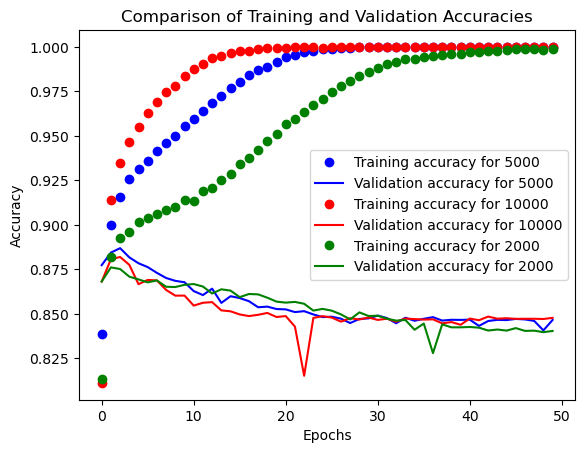

In [8]:
# Compare the accuracies of three training processes
acc5000 = history5000.history['acc']
val_acc5000 = history5000.history['val_acc']
acc10000 = history10000.history['acc']
val_acc10000 = history10000.history['val_acc']
acc2000 = history2000.history['acc']
val_acc2000 = history2000.history['val_acc']

PlotThreeAccuracyComparison(acc5000, val_acc5000, acc10000, val_acc10000, acc2000, val_acc2000, '5000', '10000', '2000')

In [9]:
import matplotlib.pyplot as plt  # library for plotting math functions: https://matplotlib.org/stable/index.html

def PlotThreeLossComparison(loss1, val_loss1, loss2, val_loss2, loss3, val_loss3, lab1 = '1', lab2 = '2', lab3 = '3'):
    plt.clf()   # clear figure
    plt.rcParams['figure.figsize'] = (25.0, 5.0) # set default size of plots
    epochs = range(len(loss1))
    plt.plot(epochs, loss1, 'bo', label='Training loss for ' + lab1)
    plt.plot(epochs, val_loss1, 'b', label='Validation loss for ' + lab1)
    plt.plot(epochs, loss2, 'ro', label='Training loss for ' + lab2)
    plt.plot(epochs, val_loss2, 'r', label='Validation loss for ' + lab2)
    plt.plot(epochs, loss3, 'go', label='Training loss for ' + lab3)
    plt.plot(epochs, val_loss3, 'g', label='Validation loss for ' + lab3)
    plt.title('Comparison of Training and Validation Losses')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

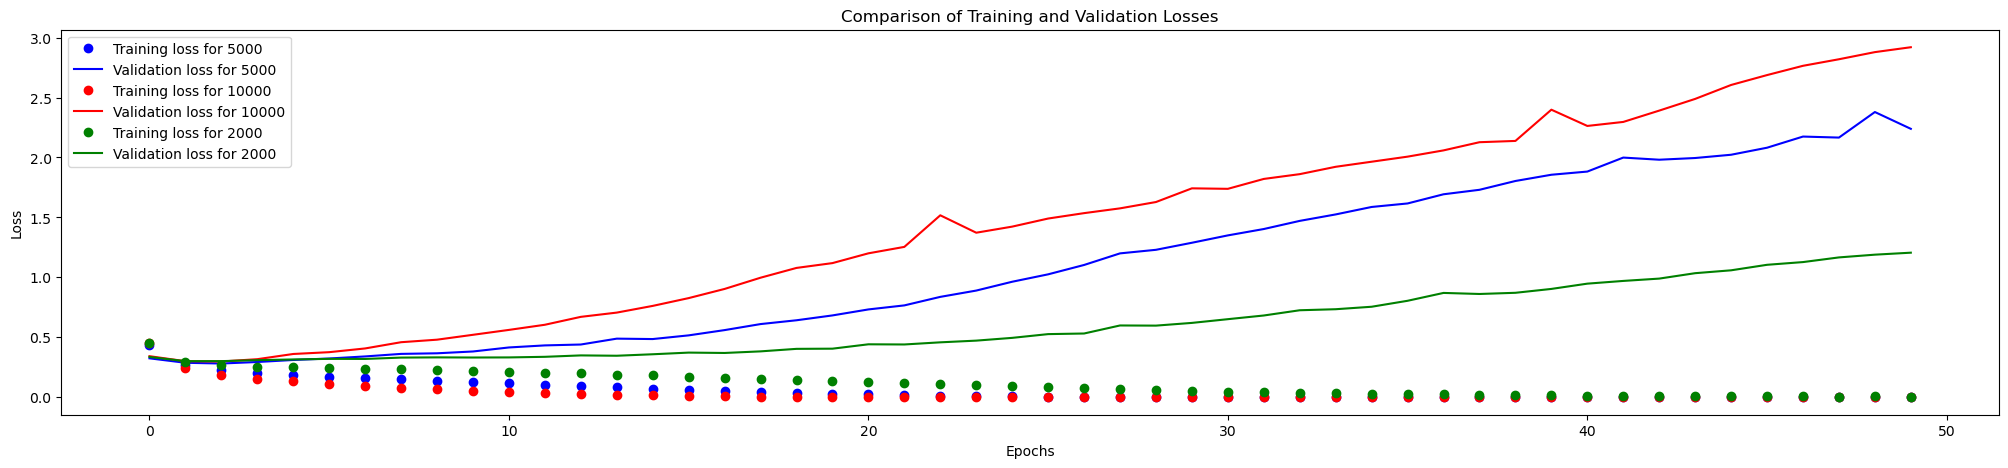

In [10]:
# Compare the losses of three training processes
loss5000 = history5000.history['loss']
val_loss5000 = history5000.history['val_loss']
loss10000 = history10000.history['loss']
val_loss10000 = history10000.history['val_loss']
loss2000 = history2000.history['loss']
val_loss2000 = history2000.history['val_loss']

PlotThreeLossComparison(loss5000, val_loss5000, loss10000, val_loss10000, loss2000, val_loss2000, '5000', '10000', '2000')

In [11]:
argmax1 = np.argmax(val_acc5000)
argmax2 = np.argmax(val_acc10000)
argmax3 = np.argmax(val_acc2000)
print ('Max accuracy for model 1 is: ', val_acc5000[argmax1], ', achieved in the ', argmax1 , 'epoch.')
print ('Max accuracy for model 2 is: ', val_acc10000[argmax2], ', achieved in the ', argmax2 , 'epoch.')
print ('Max accuracy for model 3 is: ', val_acc2000[argmax3], ', achieved in the ', argmax3 , 'epoch.')

Max accuracy for model 1 is:  0.8869199752807617 , achieved in the  2 epoch.
Max accuracy for model 2 is:  0.8819599747657776 , achieved in the  2 epoch.
Max accuracy for model 3 is:  0.8761199712753296 , achieved in the  1 epoch.


It shows the maximum validation accuracies achieved during the training and the epoch when it happened. 

## Remarks

As we can see, the accuracy of the model rises slower for the less number of the used words, but the validation loss decreases with the decreasing number of the most frequently used words. So, we can conclude that the use of a smaller number of the most frequently used words is efficient for this task.

We can also notice that the adaptation process of the smallest set of the most frequent words takes the longest time (as is visible in tha Accuracy chart), but this is a positive consequence of forcing the network to learn compressed representation which results in better generalization than achieved for the models which are fitting too quickly! We can conclude that if the model is fitting very quickly, it will overfit the most probably!

Now, you can try to check the other numbers of the most frequent words, e.g. num_top_words=1500 or 1000 or 500 and find the optimal number of such words used in the construction of this model. 

## Fighting overfitting: Reducing the size of the network

One of the simplest ways to prevent overfitting is to reduce the size of the model, i.e. the number of learnable parameters (e.g. weights) in the model, which is determined by the number of layers and the number of units per layer. In deep learning, the number of learnable parameters in a model is often referred to as <b>the model's "capacity"</b>. Intuitively, a model with more parameters will have more "memorization capacity" and therefore will be able to easily learn a perfect dictionary-like mapping between training samples and their targets, i.e. a mapping without any generalization power.

For instance, a model with 600,000 binary parameters could easily be made to learn the classes of all digits of the 
MNIST training set: we would only need 10 binary parameters for each of the 60,000 digits. However, such a model would be useless for classifying new digit samples. Don't believe, check it! Bear this in mind: deep learning models tend to be good at fitting to the training data, but the real challenge is generalization, not fitting. When generalization is poor the model is useless!

On the other hand, if the network has limited memorization resources, it could not be able to learn the desired mapping easily, and thus, in order to minimize its loss, it will have to resort to learning compressed representations that have predictive power regarding the targets -- precisely the type of representations that we are interested in. At the same time, keep in mind that you should be using models that have enough parameters that they won't be underfitting: your model shouldn't be starved for memorization resources. Therefor, we need to find an appropriate compromise between "too much capacity" and "not enough capacity".

Unfortunately, there is no magical formula to determine what the right number of layers is, or what the right size for each layer is. This is a good subject for the scientific study! You will have to evaluate an array of different architectures (on your validation set) in order to find the right model size for your data. The general workflow to find an appropriate model size is to start with relatively few layers and size of layers (i.e., small number of parameters), and start increasing the size of the layers or adding new layers until you see diminishing returns with regard to the validation loss.

Let's try to do this on our movie review classification network. We will compare three networks with different numbers of units in hidden layers, using 2000 of the most frequent words since it was found to return the lowest loss:

In [12]:
# Load IMDB data with the specified number of the most frequently words
num_top_words=2000
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=num_top_words)

x_train, y_train  = vectorize_data_float_labels(train_data, train_labels, num_top_words)
x_val, y_val = vectorize_data_float_labels(test_data, test_labels, num_top_words)

model1 = Create3LModel(num_top_words=num_top_words, hl1 = 16, hl2 = 8)

model1.summary()

model1.compile(optimizer='rmsprop',
               loss='binary_crossentropy',
               metrics=['acc'])

history1 = model1.fit(x_train, y_train,
                      epochs=100,
                      batch_size=256,
                      validation_data=(x_val, y_val))

<__array_function__ internals>:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/home/ignatella/anaconda3/envs/ML/lib/python3.9/site-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/home/ignatella/anaconda3/envs/ML/lib/python3.9/site-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different leng

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 16)                32016     
_________________________________________________________________
dense_10 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 9         
Total params: 32,161
Trainable params: 32,161
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
98/98 [==============================] - 1s 7ms/step - loss: 0.5160 - acc: 0.7488 - val_loss: 0.3242 - val_acc: 0.8671
Epoch 2/100
98/98 [==============================] - 0s 4ms/step - loss: 0.2898 - acc: 0.8861 - val_loss: 0.3425 - val_acc: 0.8552
Epoch 3/100
98/98 [==============================] - 0s 4ms/step - loss: 0.2636 - acc: 0.8960 - val_loss: 0.3354 - val

In [13]:
# Load IMDB data with the specified number of the most frequently words
num_top_words=2000
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=num_top_words)

x_train, y_train  = vectorize_data_float_labels(train_data, train_labels, num_top_words)
x_val, y_val = vectorize_data_float_labels(test_data, test_labels, num_top_words)

model2 = Create3LModel(num_top_words=num_top_words, hl1 = 64, hl2 = 32)

model2.summary()

model2.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['acc'])

history2 = model2.fit(x_train, y_train,
                      epochs=100,
                      batch_size=256,
                      validation_data=(x_val, y_val))

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 64)                128064    
_________________________________________________________________
dense_13 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 33        
Total params: 130,177
Trainable params: 130,177
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
98/98 [==============================] - 1s 8ms/step - loss: 0.4977 - acc: 0.7501 - val_loss: 0.3322 - val_acc: 0.8601
Epoch 2/100
98/98 [==============================] - 1s 6ms/step - loss: 0.2885 - acc: 0.8809 - val_loss: 0.3052 - val_acc: 0.8710
Epoch 3/100
98/98 [==============================] - 1s 6ms/step - loss: 0.2515 - acc: 0.9006 - val_loss: 0.3002 - v

In [14]:
# Load IMDB data with the specified number of the most frequently words
num_top_words=2000
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=num_top_words)

x_train, y_train  = vectorize_data_float_labels(train_data, train_labels, num_top_words)
x_val, y_val = vectorize_data_float_labels(test_data, test_labels, num_top_words)

model3 = Create3LModel(num_top_words=num_top_words, hl1 = 8, hl2 = 4)

model3.summary()

model3.compile(optimizer='rmsprop',
               loss='binary_crossentropy',
               metrics=['acc'])

history3 = model3.fit(x_train, y_train,
                      epochs=100,
                      batch_size=256,
                      validation_data=(x_val, y_val))

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 8)                 16008     
_________________________________________________________________
dense_16 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 5         
Total params: 16,049
Trainable params: 16,049
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
98/98 [==============================] - 1s 6ms/step - loss: 0.5515 - acc: 0.7228 - val_loss: 0.3464 - val_acc: 0.8641
Epoch 2/100
98/98 [==============================] - 0s 4ms/step - loss: 0.3176 - acc: 0.8782 - val_loss: 0.3034 - val_acc: 0.8748
Epoch 3/100
98/98 [==============================] - 0s 5ms/step - loss: 0.2664 - acc: 0.8947 - val_loss: 0.3021 - val

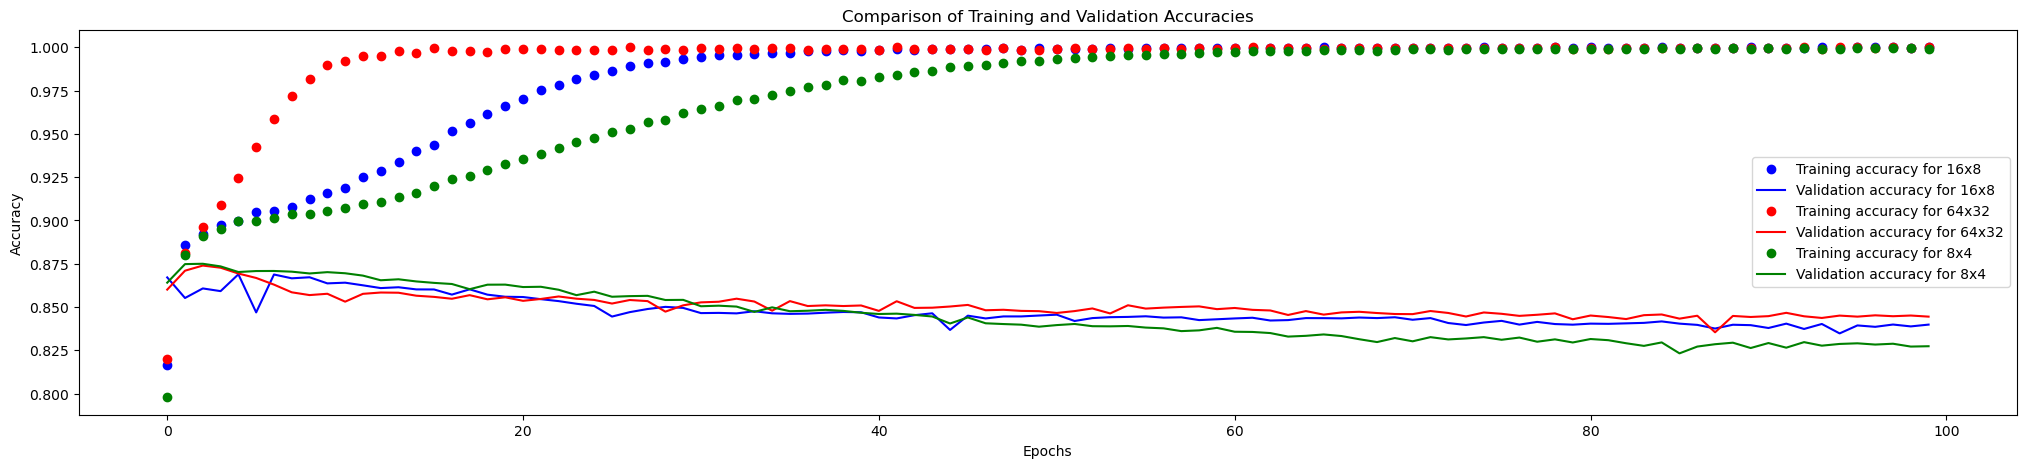

In [15]:
# Compare the accuracies of three training processes
acc1 = history1.history['acc']
val_acc1 = history1.history['val_acc']
acc2 = history2.history['acc']
val_acc2 = history2.history['val_acc']
acc3 = history3.history['acc']
val_acc3 = history3.history['val_acc']

PlotThreeAccuracyComparison(acc1, val_acc1, acc2, val_acc2, acc3, val_acc3, '16x8', '64x32', '8x4')

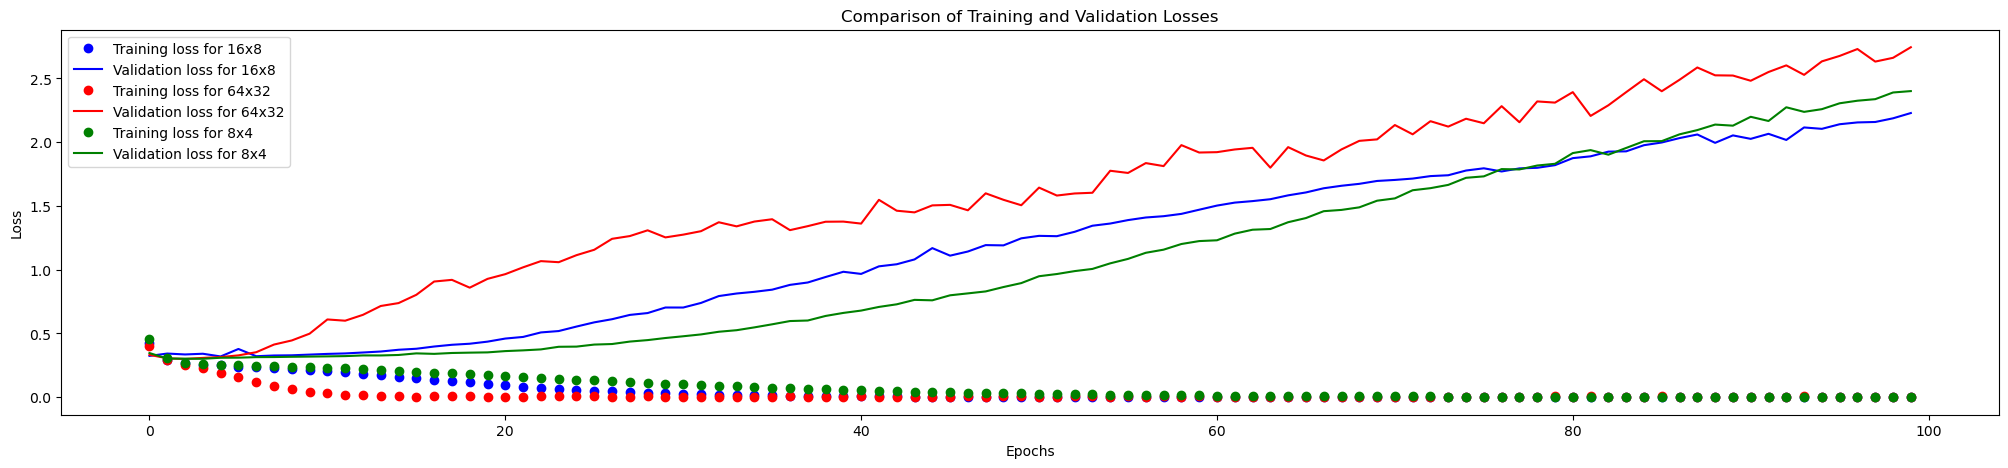

In [16]:
# Compare the losses of three training processes
loss1 = history1.history['loss']
val_loss1 = history1.history['val_loss']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']
loss3 = history3.history['loss']
val_loss3 = history3.history['val_loss']

PlotThreeLossComparison(loss1, val_loss1, loss2, val_loss2, loss3, val_loss3, '16x8', '64x32', '8x4')

Again, the model with the smallest number of units in hidden layers achieved the smallest loss in comparison to the other two models; however it learned the slowest because the representation in a small number of units is more challenging than for the other networks. As we could see, we should train this model even longer than for 100 epochs.

The biggest model converged very quickly and fitted almost all training examples perfectly, but its generalization properties are the worst from the compared models because its memorization capacity is too big.

In [17]:
argmax1 = np.argmax(val_acc1)
argmax2 = np.argmax(val_acc2)
argmax3 = np.argmax(val_acc3)
print ('Max accuracy for model 1 is: ', val_acc1[argmax1], ', achieved in the ', argmax1 , 'epoch.')
print ('Max accuracy for model 2 is: ', val_acc2[argmax2], ', achieved in the ', argmax2 , 'epoch.')
print ('Max accuracy for model 3 is: ', val_acc3[argmax3], ', achieved in the ', argmax3 , 'epoch.')

Max accuracy for model 1 is:  0.8689200282096863 , achieved in the  4 epoch.
Max accuracy for model 2 is:  0.873960018157959 , achieved in the  2 epoch.
Max accuracy for model 3 is:  0.875 , achieved in the  2 epoch.


It shows the maximum validation accuracies achieved during the training and the epoch when it happened. 

## Fighting overfitting: Adding weight regularization

If we have two explanations to something, then going after the _Occam's Razor_ principle, the explanation most likely to be correct is the "simplest" one, i.e., the one that makes the least amount of assumptions. This also applies to the neural models: simpler models are less likely to overfit than complex ones.

A "simple model" a model where the distribution of parameter values has less entropy. Thus, a common way to mitigate overfitting is to put constraints on the complexity of a network by forcing its weights to only take small values, which makes the distribution of weight values more "regular". This is called <b>weight regularization</b>, and it is done by adding to the loss function of the network a _cost_ associated with having large weights. This _cost_ comes in two flavors:
* <b>L1 regularization</b>, where the _cost_ added is proportional to the _absolute value of the weights coefficients_ (called the "<b>L1 norm</b>" of the weights).
* <b>L2 regularization</b>, where the _cost_ added is proportional to the _square of the value of the weights coefficients_ (called the "<b>L2 norm</b>" of the weights). L2 regularization is also called <b>_weight decay_</b> in the context of neural networks. Don't let the different name confuse you: weight decay is mathematically the exact same as L2 regularization.

In Keras, weight regularization is added by passing _weight regularizer instances_ to layers as keyword arguments. We can choose between three options:

In [18]:
from keras import regularizers

# L1 regularization
regularizers.l1(0.001)

# L2 regularization
regularizers.l2(0.001)

# L1 and L2 regularization at the same time
regularizers.l1_l2(l1=0.001, l2=0.001)

Let's add weight regularization to our best movie review classification network found in the previous steps and check all three options:

In [19]:
def Create3LModelL1(num_top_words, hl1 = 8, hl2 = 4):
    model = models.Sequential()
    model.add(layers.Dense(hl1, kernel_regularizer=regularizers.l1(0.001),
                           activation='relu', input_shape=(num_top_words,)))
    model.add(layers.Dense(hl2, kernel_regularizer=regularizers.l1(0.001),
                           activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    return model

def Create3LModelL2(num_top_words, hl1 = 8, hl2 = 4):
    model = models.Sequential()
    model.add(layers.Dense(hl1, kernel_regularizer=regularizers.l2(0.001),
                           activation='relu', input_shape=(num_top_words,)))
    model.add(layers.Dense(hl2, kernel_regularizer=regularizers.l2(0.001),
                           activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    return model

def Create3LModelL1L2(num_top_words, hl1 = 8, hl2 = 4):
    model = models.Sequential()
    model.add(layers.Dense(hl1, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                           activation='relu', input_shape=(num_top_words,)))
    model.add(layers.Dense(hl2, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                           activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    return model

In [20]:
# Load IMDB data with the specified number of the most frequently words
num_top_words=2000
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=num_top_words)

x_train, y_train  = vectorize_data_float_labels(train_data, train_labels, num_top_words)
x_val, y_val = vectorize_data_float_labels(test_data, test_labels, num_top_words)

model1 = Create3LModelL1(num_top_words=num_top_words, hl1 = 8, hl2 = 4)

model1.compile(optimizer='rmsprop',
               loss='binary_crossentropy',
               metrics=['acc'])

historyL1 = model1.fit(x_train, y_train,
                       epochs=100,
                       batch_size=256,
                       validation_data=(x_val, y_val))

Epoch 1/100
98/98 [==============================] - 1s 7ms/step - loss: 0.8820 - acc: 0.6294 - val_loss: 0.6076 - val_acc: 0.8200
Epoch 2/100
98/98 [==============================] - 0s 4ms/step - loss: 0.5932 - acc: 0.8323 - val_loss: 0.5662 - val_acc: 0.8591
Epoch 3/100
98/98 [==============================] - 0s 4ms/step - loss: 0.5527 - acc: 0.8514 - val_loss: 0.5382 - val_acc: 0.8580
Epoch 4/100
98/98 [==============================] - 0s 4ms/step - loss: 0.5347 - acc: 0.8600 - val_loss: 0.5203 - val_acc: 0.8566
Epoch 5/100
98/98 [==============================] - 0s 4ms/step - loss: 0.5148 - acc: 0.8604 - val_loss: 0.5065 - val_acc: 0.8657
Epoch 6/100
98/98 [==============================] - 0s 4ms/step - loss: 0.4983 - acc: 0.8676 - val_loss: 0.5100 - val_acc: 0.8391
Epoch 7/100
98/98 [==============================] - 0s 4ms/step - loss: 0.4895 - acc: 0.8694 - val_loss: 0.4808 - val_acc: 0.8664
Epoch 8/100
98/98 [==============================] - 0s 4ms/step - loss: 0.4752 - a

In [21]:
# Load IMDB data with the specified number of the most frequently words
num_top_words=2000
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=num_top_words)

x_train, y_train  = vectorize_data_float_labels(train_data, train_labels, num_top_words)
x_val, y_val = vectorize_data_float_labels(test_data, test_labels, num_top_words)

model2 = Create3LModelL2(num_top_words=num_top_words, hl1 = 8, hl2 = 4)

model2.compile(optimizer='rmsprop',
               loss='binary_crossentropy',
               metrics=['acc'])

historyL2 = model2.fit(x_train, y_train,
                       epochs=100,
                       batch_size=256,
                       validation_data=(x_val, y_val))

Epoch 1/100
98/98 [==============================] - 1s 6ms/step - loss: 0.5784 - acc: 0.7321 - val_loss: 0.3766 - val_acc: 0.8625
Epoch 2/100
98/98 [==============================] - 0s 3ms/step - loss: 0.3466 - acc: 0.8712 - val_loss: 0.3312 - val_acc: 0.8746
Epoch 3/100
98/98 [==============================] - 0s 3ms/step - loss: 0.3057 - acc: 0.8903 - val_loss: 0.3399 - val_acc: 0.8685
Epoch 4/100
98/98 [==============================] - 0s 3ms/step - loss: 0.2868 - acc: 0.8970 - val_loss: 0.3257 - val_acc: 0.8746
Epoch 5/100
98/98 [==============================] - 0s 3ms/step - loss: 0.2757 - acc: 0.8999 - val_loss: 0.3403 - val_acc: 0.8691
Epoch 6/100
98/98 [==============================] - 0s 3ms/step - loss: 0.2810 - acc: 0.8987 - val_loss: 0.3308 - val_acc: 0.8728
Epoch 7/100
98/98 [==============================] - 0s 3ms/step - loss: 0.2729 - acc: 0.9047 - val_loss: 0.3375 - val_acc: 0.8699
Epoch 8/100
98/98 [==============================] - 0s 3ms/step - loss: 0.2666 - a

In [22]:
# Load IMDB data with the specified number of the most frequently words
num_top_words=2000
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=num_top_words)

x_train, y_train  = vectorize_data_float_labels(train_data, train_labels, num_top_words)
x_val, y_val = vectorize_data_float_labels(test_data, test_labels, num_top_words)

model3 = Create3LModelL1L2(num_top_words=num_top_words, hl1 = 8, hl2 = 4)

model3.compile(optimizer='rmsprop',
               loss='binary_crossentropy',
               metrics=['acc'])

historyL3 = model3.fit(x_train, y_train,
                       epochs=100,
                       batch_size=256,
                       validation_data=(x_val, y_val))

Epoch 1/100
98/98 [==============================] - 1s 6ms/step - loss: 0.8518 - acc: 0.7156 - val_loss: 0.5482 - val_acc: 0.8383
Epoch 2/100
98/98 [==============================] - 0s 3ms/step - loss: 0.5235 - acc: 0.8465 - val_loss: 0.4906 - val_acc: 0.8554
Epoch 3/100
98/98 [==============================] - 0s 3ms/step - loss: 0.4759 - acc: 0.8591 - val_loss: 0.4789 - val_acc: 0.8543
Epoch 4/100
98/98 [==============================] - 0s 3ms/step - loss: 0.4639 - acc: 0.8627 - val_loss: 0.4641 - val_acc: 0.8590
Epoch 5/100
98/98 [==============================] - 0s 3ms/step - loss: 0.4549 - acc: 0.8618 - val_loss: 0.5358 - val_acc: 0.8162
Epoch 6/100
98/98 [==============================] - 0s 3ms/step - loss: 0.4443 - acc: 0.8672 - val_loss: 0.4433 - val_acc: 0.8646
Epoch 7/100
98/98 [==============================] - 0s 3ms/step - loss: 0.4361 - acc: 0.8696 - val_loss: 0.4639 - val_acc: 0.8527
Epoch 8/100
98/98 [==============================] - 0s 3ms/step - loss: 0.4315 - a

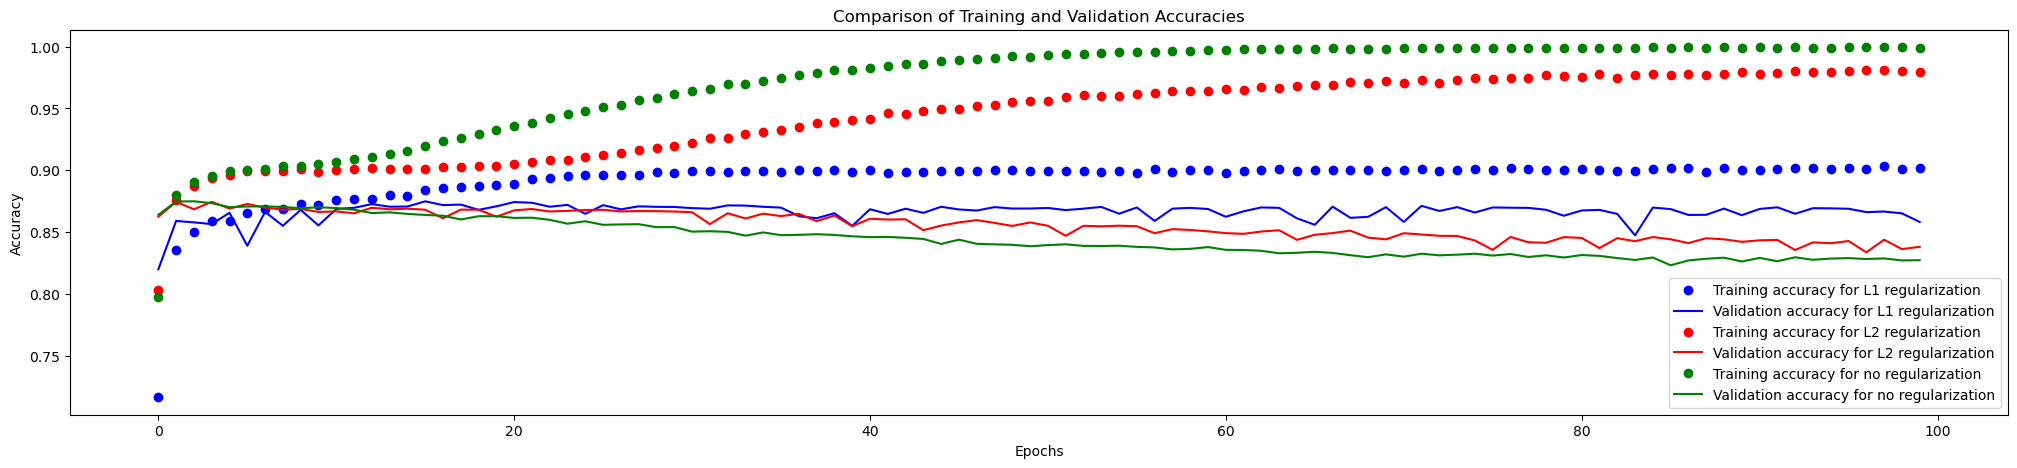

In [23]:
# Compare the accuracies of three training processes
acc1 = historyL1.history['acc']
val_acc1 = historyL1.history['val_acc']
acc2 = historyL2.history['acc']
val_acc2 = historyL2.history['val_acc']
acc3 = history3.history['acc']
val_acc3 = history3.history['val_acc']

PlotThreeAccuracyComparison(acc1, val_acc1, acc2, val_acc2, acc3, val_acc3, 'L1 regularization', 'L2 regularization', 'no regularization')

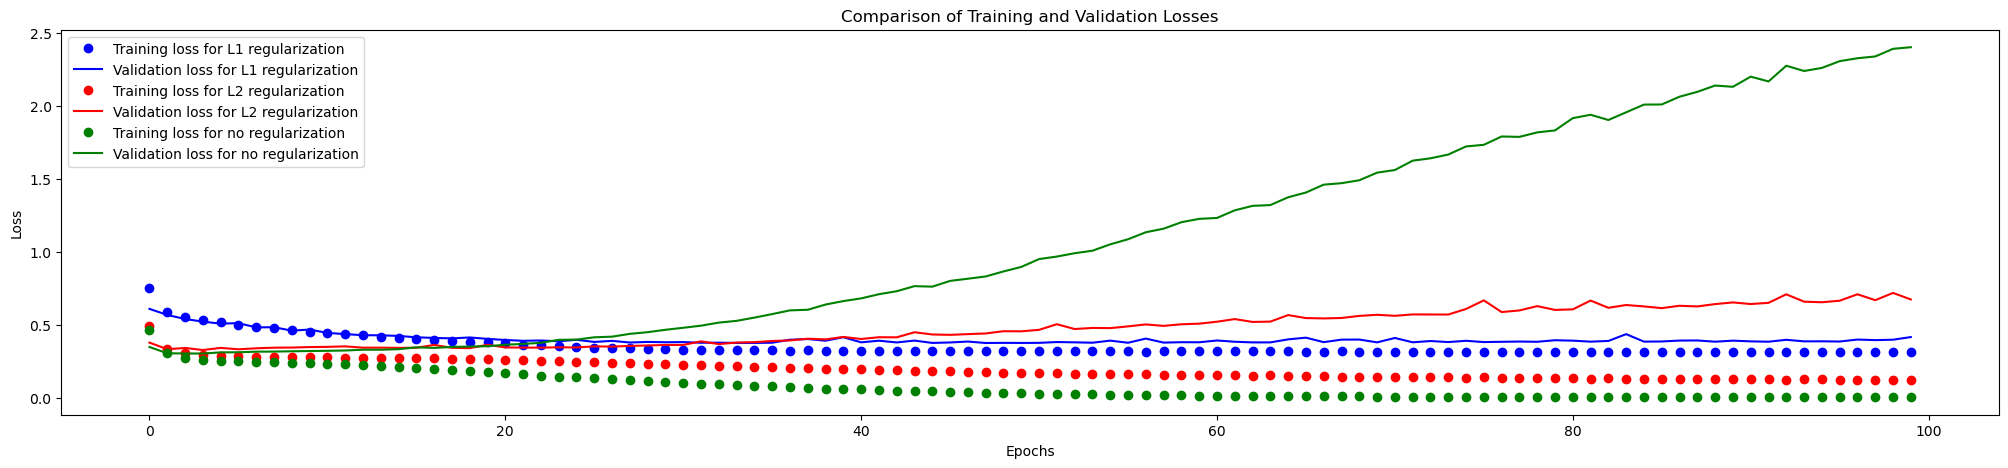

In [24]:
# Compare the losses of three training processes
loss1 = historyL1.history['loss']
val_loss1 = historyL1.history['val_loss']
loss2 = historyL2.history['loss']
val_loss2 = historyL2.history['val_loss']
loss3 = history3.history['loss']
val_loss3 = history3.history['val_loss']

PlotThreeLossComparison(loss1, val_loss1, loss2, val_loss2, loss3, val_loss3, 'L1 regularization', 'L2 regularization', 'no regularization')

In [25]:
argmax1 = np.argmax(val_acc1)
argmax2 = np.argmax(val_acc2)
argmax3 = np.argmax(val_acc3)
print ('Max accuracy for model 1 is: ', val_acc1[argmax1], ', achieved in the ', argmax1 , 'epoch.')
print ('Max accuracy for model 2 is: ', val_acc2[argmax2], ', achieved in the ', argmax2 , 'epoch.')
print ('Max accuracy for model 3 is: ', val_acc3[argmax3], ', achieved in the ', argmax3 , 'epoch.')

Max accuracy for model 1 is:  0.8749600052833557 , achieved in the  15 epoch.
Max accuracy for model 2 is:  0.8745999932289124 , achieved in the  1 epoch.
Max accuracy for model 3 is:  0.875 , achieved in the  2 epoch.


Now, we can compare training results for the model without regularization and the models with L1 or L2 regularization.

The model without regularization had less loss during the training time, but for the validation data, we can see that the results achieved for both L1 and L2 regularized models are much better than for the non-regularized model!

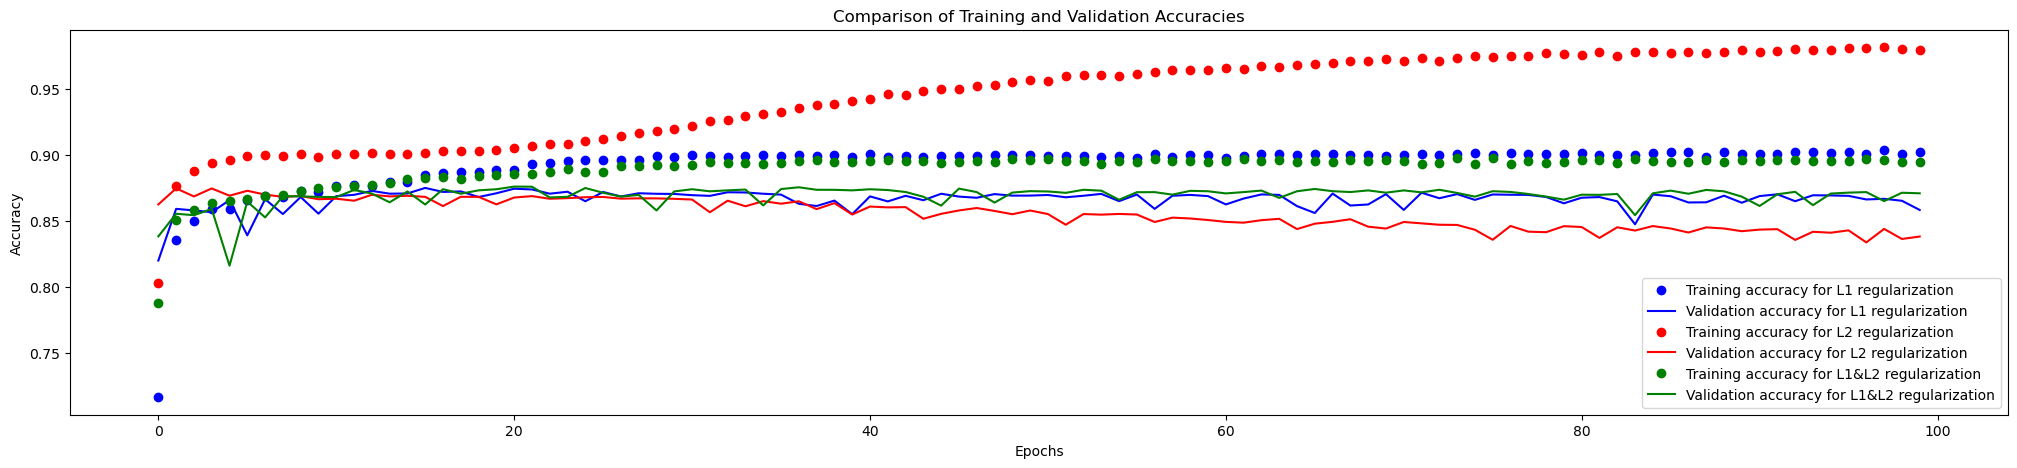

In [26]:
# Compare the accuracies of three training processes
acc1 = historyL1.history['acc']
val_acc1 = historyL1.history['val_acc']
acc2 = historyL2.history['acc']
val_acc2 = historyL2.history['val_acc']
acc3 = historyL3.history['acc']
val_acc3 = historyL3.history['val_acc']

PlotThreeAccuracyComparison(acc1, val_acc1, acc2, val_acc2, acc3, val_acc3, 'L1 regularization', 'L2 regularization', 'L1&L2 regularization')

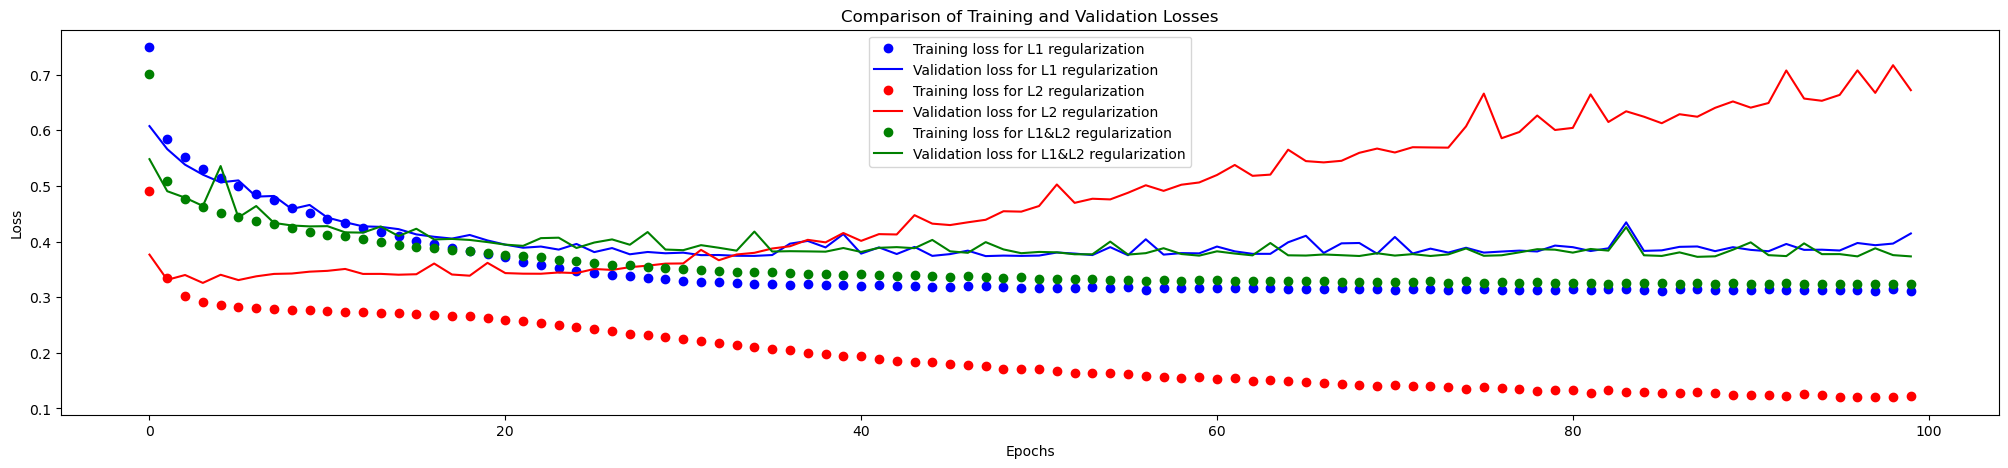

In [27]:
# Compare the losses of three training processes
loss1 = historyL1.history['loss']
val_loss1 = historyL1.history['val_loss']
loss2 = historyL2.history['loss']
val_loss2 = historyL2.history['val_loss']
loss3 = historyL3.history['loss']
val_loss3 = historyL3.history['val_loss']

PlotThreeLossComparison(loss1, val_loss1, loss2, val_loss2, loss3, val_loss3, 'L1 regularization', 'L2 regularization', 'L1&L2 regularization')

The comparison of the losses for L1, L2 and L1&L2 regularizations shows us that the least loss during training was achieved for L2 regularization, but the worst loss for the validation data at the same time. There is not much difference between the use of L1 and L1&L2 regularizations.

We could see how the L2 regularization (`l2(0.001)`) penalty impacted the training process. `l2(0.001)` means that every coefficient in the weight matrix of the layer will add `0.001 * weight_coefficient_value` to the total loss of the network. Note that because this penalty is _only added at training time_, the loss for this network was be much higher at training 
than at test time.

In [28]:
argmax1 = np.argmax(val_acc1)
argmax2 = np.argmax(val_acc2)
argmax3 = np.argmax(val_acc3)
print ('Max accuracy for model 1 is: ', val_acc1[argmax1], ', achieved in the ', argmax1 , 'epoch.')
print ('Max accuracy for model 2 is: ', val_acc2[argmax2], ', achieved in the ', argmax2 , 'epoch.')
print ('Max accuracy for model 3 is: ', val_acc3[argmax3], ', achieved in the ', argmax3 , 'epoch.')

Max accuracy for model 1 is:  0.8749600052833557 , achieved in the  15 epoch.
Max accuracy for model 2 is:  0.8745999932289124 , achieved in the  1 epoch.
Max accuracy for model 3 is:  0.8759599924087524 , achieved in the  20 epoch.


## Fighting overfitting: Adding dropout

<b>Dropout</b> is one of the most effective and commonly used regularization techniques for neural networks, developed by Hinton and his students at the University of Toronto. Dropout, applied to a layer, consists of randomly "dropping out" (i.e., setting to zero) a number of output features of the layer during training with a given probability (usually between 0.2 and 0.5). At test time, no units are dropped out, and instead the layer's output values are scaled down by a factor equal to the dropout rate, so as to balance for the fact that more units are active than at training time.

To illustrate it, consider a Numpy matrix containing the output of a layer, `layer_output`, of shape `(batch_size, features)`. At training time, we would be zero-ing out at random a fraction of the values in the matrix and scaling by 0.5 to stay consistent with the similar strength of stimulation in the test time and leaving the output unchanged at test time:

In [29]:
# At training time:
#layer_output *= np.randint(0, high=2, size=layer_output.shape)
# We are scaling *up* to stay consistent with the stimulations in the test time
#layer_output /= 0.5


This technique may seem strange and arbitrary. Why would this help reduce overfitting? Geoff Hinton has said that he was inspired, among other things, by a fraud prevention mechanism used by banks - in his own words: _"I went to my bank. The tellers kept changing and I asked one of them why. He said he didn’t know but they got moved around a lot. I figured it must be because it would require cooperation between employees to successfully defraud the bank. This made me realize that randomly removing a different subset of neurons on each example would prevent conspiracies and thus reduce overfitting"_.

The core idea is that introducing noise in the output values of a layer can break up happenstance patterns that are not significant (what Hinton refers to as "conspiracies"), which the network would start memorizing if no noise was present. 

In Keras, you can introduce dropout in a network via the `Dropout` layer, which gets applied to the output of layer right before it:

`model.add(layers.Dropout(0.5))`

We should use dropout with care, especially to layers containing small number of units because switching out too many units can result in underfitting, so in the following experiments we double the number of units in the hidden layers.

Let's do three experiments with dropout of different probabilities `probdrop` to check which one is reducing the overfitting the most in our IMDB network:

In [30]:
def Create3LModelL1Dropout(num_top_words, hl1 = 8, hl2 = 4, probdrop=0.5):
    model = models.Sequential()
    model.add(layers.Dense(hl1, kernel_regularizer=regularizers.l1(0.001),
                           activation='relu', input_shape=(num_top_words,)))
    model.add(layers.Dropout(probdrop))
    model.add(layers.Dense(hl2, kernel_regularizer=regularizers.l1(0.001),
                           activation='relu'))
    model.add(layers.Dropout(probdrop))
    model.add(layers.Dense(1, activation='sigmoid'))
    return model

In [31]:
# Load IMDB data with the specified number of the most frequently words
num_top_words=2000
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=num_top_words)

x_train, y_train  = vectorize_data_float_labels(train_data, train_labels, num_top_words)
x_val, y_val = vectorize_data_float_labels(test_data, test_labels, num_top_words)

model1 = Create3LModelL1Dropout(num_top_words=num_top_words, hl1 = 16, hl2 = 8, probdrop=0.5)

model1.compile(optimizer='rmsprop',
               loss='binary_crossentropy',
               metrics=['acc'])

historyD1 = model1.fit(x_train, y_train,
                       epochs=100,
                       batch_size=256,
                       validation_data=(x_val, y_val))

Epoch 1/100
98/98 [==============================] - 1s 6ms/step - loss: 1.1383 - acc: 0.5733 - val_loss: 0.6656 - val_acc: 0.8166
Epoch 2/100
98/98 [==============================] - 0s 4ms/step - loss: 0.6864 - acc: 0.7204 - val_loss: 0.5731 - val_acc: 0.8362
Epoch 3/100
98/98 [==============================] - 0s 4ms/step - loss: 0.6277 - acc: 0.7839 - val_loss: 0.5735 - val_acc: 0.8061
Epoch 4/100
98/98 [==============================] - 0s 4ms/step - loss: 0.6006 - acc: 0.8052 - val_loss: 0.5086 - val_acc: 0.8570
Epoch 5/100
98/98 [==============================] - 0s 4ms/step - loss: 0.5843 - acc: 0.8206 - val_loss: 0.5009 - val_acc: 0.8565
Epoch 6/100
98/98 [==============================] - 0s 4ms/step - loss: 0.5755 - acc: 0.8242 - val_loss: 0.5022 - val_acc: 0.8540
Epoch 7/100
98/98 [==============================] - 1s 6ms/step - loss: 0.5753 - acc: 0.8306 - val_loss: 0.4931 - val_acc: 0.8628
Epoch 8/100
98/98 [==============================] - 0s 4ms/step - loss: 0.5617 - a

In [32]:
# Load IMDB data with the specified number of the most frequently words
num_top_words=2000
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=num_top_words)

x_train, y_train  = vectorize_data_float_labels(train_data, train_labels, num_top_words)
x_val, y_val = vectorize_data_float_labels(test_data, test_labels, num_top_words)

model2 = Create3LModelL1Dropout(num_top_words=num_top_words, hl1 = 16, hl2 = 8, probdrop=0.25)

model2.compile(optimizer='rmsprop',
               loss='binary_crossentropy',
               metrics=['acc'])

historyD2 = model2.fit(x_train, y_train,
                       epochs=100,
                       batch_size=256,
                       validation_data=(x_val, y_val))

Epoch 1/100
98/98 [==============================] - 1s 6ms/step - loss: 1.0796 - acc: 0.6594 - val_loss: 0.6379 - val_acc: 0.7996
Epoch 2/100
98/98 [==============================] - 0s 4ms/step - loss: 0.6376 - acc: 0.7966 - val_loss: 0.5423 - val_acc: 0.8442
Epoch 3/100
98/98 [==============================] - 0s 4ms/step - loss: 0.5678 - acc: 0.8180 - val_loss: 0.5006 - val_acc: 0.8553
Epoch 4/100
98/98 [==============================] - 0s 4ms/step - loss: 0.5315 - acc: 0.8331 - val_loss: 0.4775 - val_acc: 0.8611
Epoch 5/100
98/98 [==============================] - 0s 4ms/step - loss: 0.5195 - acc: 0.8371 - val_loss: 0.4665 - val_acc: 0.8615
Epoch 6/100
98/98 [==============================] - 0s 4ms/step - loss: 0.5051 - acc: 0.8448 - val_loss: 0.4612 - val_acc: 0.8644
Epoch 7/100
98/98 [==============================] - 0s 4ms/step - loss: 0.4920 - acc: 0.8518 - val_loss: 0.4533 - val_acc: 0.8654
Epoch 8/100
98/98 [==============================] - 0s 4ms/step - loss: 0.4865 - a

In [33]:
# Load IMDB data with the specified number of the most frequently words
num_top_words=2000
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=num_top_words)

x_train, y_train  = vectorize_data_float_labels(train_data, train_labels, num_top_words)
x_val, y_val = vectorize_data_float_labels(test_data, test_labels, num_top_words)

model3 = Create3LModelL1Dropout(num_top_words=num_top_words, hl1 = 16, hl2 = 8, probdrop=0.15)

model3.compile(optimizer='rmsprop',
               loss='binary_crossentropy',
               metrics=['acc'])

historyD3 = model3.fit(x_train, y_train,
                       epochs=100,
                       batch_size=256,
                       validation_data=(x_val, y_val))

Epoch 1/100
98/98 [==============================] - 1s 6ms/step - loss: 1.0646 - acc: 0.6661 - val_loss: 0.5827 - val_acc: 0.8450
Epoch 2/100
98/98 [==============================] - 0s 3ms/step - loss: 0.5900 - acc: 0.8021 - val_loss: 0.5203 - val_acc: 0.8565
Epoch 3/100
98/98 [==============================] - 0s 3ms/step - loss: 0.5441 - acc: 0.8266 - val_loss: 0.4962 - val_acc: 0.8525
Epoch 4/100
98/98 [==============================] - 0s 3ms/step - loss: 0.5209 - acc: 0.8355 - val_loss: 0.4813 - val_acc: 0.8556
Epoch 5/100
98/98 [==============================] - 0s 3ms/step - loss: 0.5055 - acc: 0.8479 - val_loss: 0.4757 - val_acc: 0.8553
Epoch 6/100
98/98 [==============================] - 0s 4ms/step - loss: 0.4936 - acc: 0.8499 - val_loss: 0.4603 - val_acc: 0.8632
Epoch 7/100
98/98 [==============================] - 0s 3ms/step - loss: 0.4812 - acc: 0.8567 - val_loss: 0.4610 - val_acc: 0.8612
Epoch 8/100
98/98 [==============================] - 0s 4ms/step - loss: 0.4799 - a

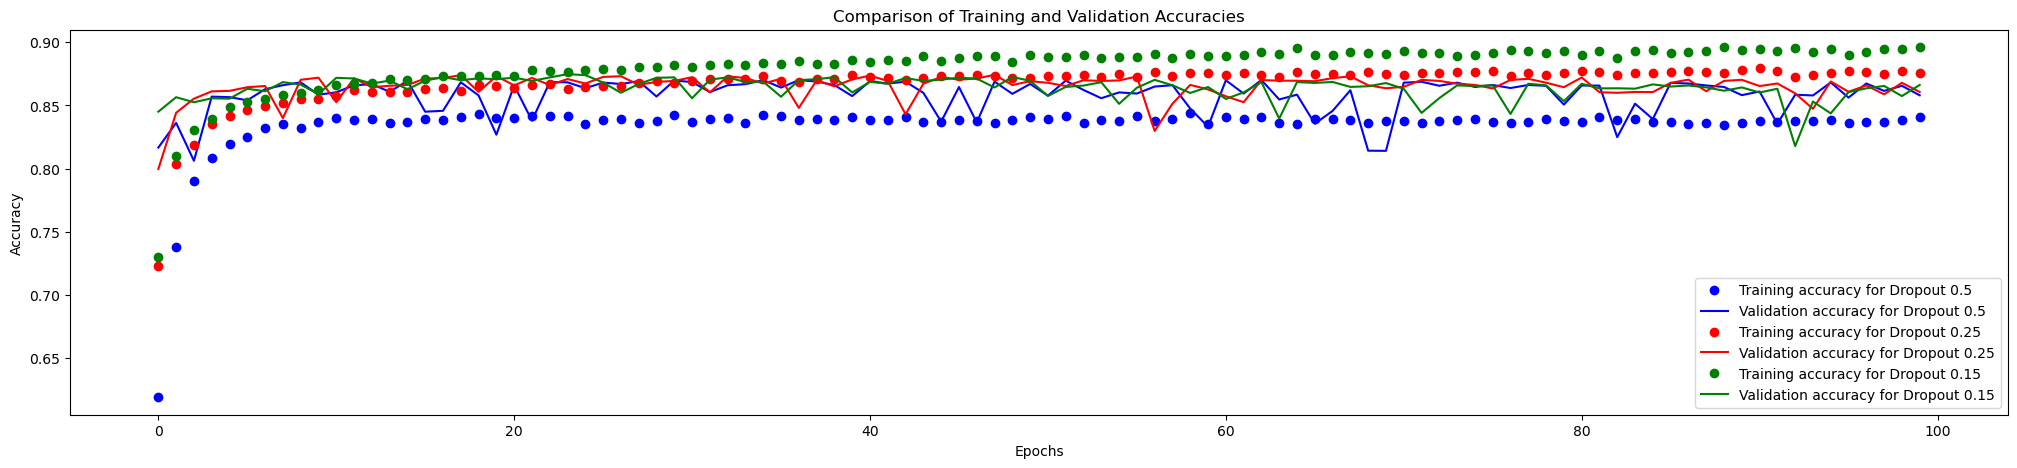

In [34]:
# Compare the accuracies of three training processes
acc1 = historyD1.history['acc']
val_acc1 = historyD1.history['val_acc']
acc2 = historyD2.history['acc']
val_acc2 = historyD2.history['val_acc']
acc3 = historyD3.history['acc']
val_acc3 = historyD3.history['val_acc']

PlotThreeAccuracyComparison(acc1, val_acc1, acc2, val_acc2, acc3, val_acc3, 'Dropout 0.5', 'Dropout 0.25', 'Dropout 0.15')

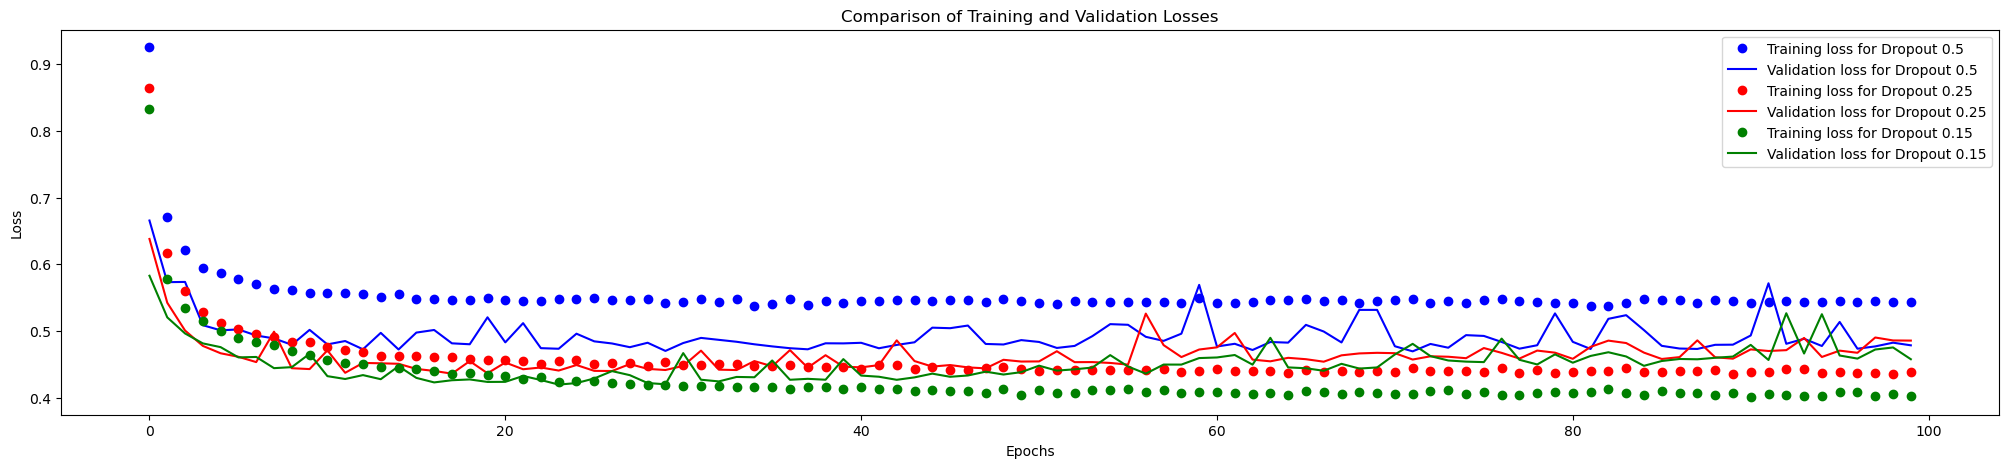

In [35]:
# Compare the losses of three training processes
loss1 = historyD1.history['loss']
val_loss1 = historyD1.history['val_loss']
loss2 = historyD2.history['loss']
val_loss2 = historyD2.history['val_loss']
loss3 = historyD3.history['loss']
val_loss3 = historyD3.history['val_loss']

PlotThreeLossComparison(loss1, val_loss1, loss2, val_loss2, loss3, val_loss3, 'Dropout 0.5', 'Dropout 0.25', 'Dropout 0.15')

There is not much difference in the validation accuracies nor losses of these models; however, the more stable is learned the model with the smallest dropout.

In [36]:
argmax1 = np.argmax(val_acc1)
argmax2 = np.argmax(val_acc2)
argmax3 = np.argmax(val_acc3)
print ('Max accuracy for model 1 is: ', val_acc1[argmax1], ', achieved in the ', argmax1 , 'epoch.')
print ('Max accuracy for model 2 is: ', val_acc2[argmax2], ', achieved in the ', argmax2 , 'epoch.')
print ('Max accuracy for model 3 is: ', val_acc3[argmax3], ', achieved in the ', argmax3 , 'epoch.')

Max accuracy for model 1 is:  0.8701199889183044 , achieved in the  62 epoch.
Max accuracy for model 2 is:  0.874239981174469 , achieved in the  47 epoch.
Max accuracy for model 3 is:  0.8747599720954895 , achieved in the  23 epoch.


## Summary

To recap: here the most common ways to prevent overfitting in neural networks:
* Getting more training data.
* Reducing the capacity of the network.
* Adding weight regularization.
* Adding dropout.

Now, change some hyperparameters (green and red) in the above models and try to achieve a final model that will be even better than the above one.

In [37]:
def Create2LModelL1Dropout(num_top_words, hl1 = 32, probdrop=0.2):
    model = models.Sequential()
    model.add(layers.Dense(hl1, kernel_regularizer=regularizers.l1(0.001),
                           activation='relu', input_shape=(num_top_words,)))
    model.add(layers.Dropout(probdrop))
    model.add(layers.Dense(1, activation='sigmoid'))
    return model

In [38]:
# Load IMDB data with the specified number of the most frequently words
num_top_words=2000
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=num_top_words)

x_train, y_train  = vectorize_data_float_labels(train_data, train_labels, num_top_words)
x_val, y_val = vectorize_data_float_labels(test_data, test_labels, num_top_words)

model1 = Create3LModelL1Dropout(num_top_words=num_top_words, hl1 = 8, probdrop=0.2)

model1.compile(optimizer='rmsprop',
               loss='binary_crossentropy',
               metrics=['acc'])

history1 = model1.fit(x_train, y_train,
                      epochs=100,
                      batch_size=512,
                      validation_data=(x_val, y_val))

Epoch 1/100
49/49 [==============================] - 1s 10ms/step - loss: 0.9401 - acc: 0.6187 - val_loss: 0.6250 - val_acc: 0.8025
Epoch 2/100
49/49 [==============================] - 0s 5ms/step - loss: 0.6327 - acc: 0.7680 - val_loss: 0.5375 - val_acc: 0.8408
Epoch 3/100
49/49 [==============================] - 0s 6ms/step - loss: 0.5698 - acc: 0.7995 - val_loss: 0.4966 - val_acc: 0.8613
Epoch 4/100
49/49 [==============================] - 0s 5ms/step - loss: 0.5380 - acc: 0.8150 - val_loss: 0.4812 - val_acc: 0.8603
Epoch 5/100
49/49 [==============================] - 0s 5ms/step - loss: 0.5235 - acc: 0.8185 - val_loss: 0.4620 - val_acc: 0.8595
Epoch 6/100
49/49 [==============================] - 0s 5ms/step - loss: 0.5047 - acc: 0.8314 - val_loss: 0.4654 - val_acc: 0.8538
Epoch 7/100
49/49 [==============================] - 0s 5ms/step - loss: 0.4902 - acc: 0.8354 - val_loss: 0.4505 - val_acc: 0.8612
Epoch 8/100
49/49 [==============================] - 0s 6ms/step - loss: 0.4852 - 

In [39]:
# Load IMDB data with the specified number of the most frequently words
num_top_words=2000
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=num_top_words)

x_train, y_train  = vectorize_data_float_labels(train_data, train_labels, num_top_words)
x_val, y_val = vectorize_data_float_labels(test_data, test_labels, num_top_words)

model2 = Create3LModelL1Dropout(num_top_words=num_top_words, hl1 = 16, probdrop=0.2)

model2.compile(optimizer='rmsprop',
               loss='binary_crossentropy',
               metrics=['acc'])

history2 = model2.fit(x_train, y_train,
                      epochs=100,
                      batch_size=512,
                      validation_data=(x_val, y_val))

Epoch 1/100
49/49 [==============================] - 1s 10ms/step - loss: 1.1689 - acc: 0.6370 - val_loss: 0.6542 - val_acc: 0.8253
Epoch 2/100
49/49 [==============================] - 0s 6ms/step - loss: 0.6440 - acc: 0.7759 - val_loss: 0.5709 - val_acc: 0.8328
Epoch 3/100
49/49 [==============================] - 0s 6ms/step - loss: 0.5844 - acc: 0.8001 - val_loss: 0.5319 - val_acc: 0.8440
Epoch 4/100
49/49 [==============================] - 0s 6ms/step - loss: 0.5615 - acc: 0.8066 - val_loss: 0.5044 - val_acc: 0.8536
Epoch 5/100
49/49 [==============================] - 0s 6ms/step - loss: 0.5399 - acc: 0.8172 - val_loss: 0.4889 - val_acc: 0.8555
Epoch 6/100
49/49 [==============================] - 0s 6ms/step - loss: 0.5277 - acc: 0.8220 - val_loss: 0.4802 - val_acc: 0.8560
Epoch 7/100
49/49 [==============================] - 0s 9ms/step - loss: 0.5169 - acc: 0.8286 - val_loss: 0.4746 - val_acc: 0.8576
Epoch 8/100
49/49 [==============================] - 0s 6ms/step - loss: 0.5120 - 

In [40]:
# Load IMDB data with the specified number of the most frequently words
num_top_words=2000
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=num_top_words)

x_train, y_train  = vectorize_data_float_labels(train_data, train_labels, num_top_words)
x_val, y_val = vectorize_data_float_labels(test_data, test_labels, num_top_words)

model3 = Create3LModelL1Dropout(num_top_words=num_top_words, hl1 = 32, probdrop=0.2)

model3.compile(optimizer='rmsprop',
               loss='binary_crossentropy',
               metrics=['acc'])

history3 = model3.fit(x_train, y_train,
                      epochs=100,
                      batch_size=512,
                      validation_data=(x_val, y_val))

Epoch 1/100
49/49 [==============================] - 1s 12ms/step - loss: 1.6425 - acc: 0.6451 - val_loss: 0.7068 - val_acc: 0.7979
Epoch 2/100
49/49 [==============================] - 0s 6ms/step - loss: 0.6974 - acc: 0.7861 - val_loss: 0.6139 - val_acc: 0.8435
Epoch 3/100
49/49 [==============================] - 0s 6ms/step - loss: 0.6330 - acc: 0.8012 - val_loss: 0.6152 - val_acc: 0.8149
Epoch 4/100
49/49 [==============================] - 0s 6ms/step - loss: 0.6077 - acc: 0.8138 - val_loss: 0.5540 - val_acc: 0.8421
Epoch 5/100
49/49 [==============================] - 0s 7ms/step - loss: 0.5855 - acc: 0.8244 - val_loss: 0.5481 - val_acc: 0.8417
Epoch 6/100
49/49 [==============================] - 0s 7ms/step - loss: 0.5799 - acc: 0.8234 - val_loss: 0.5532 - val_acc: 0.8340
Epoch 7/100
49/49 [==============================] - 0s 7ms/step - loss: 0.5644 - acc: 0.8291 - val_loss: 0.5435 - val_acc: 0.8361
Epoch 8/100
49/49 [==============================] - 0s 6ms/step - loss: 0.5622 - 

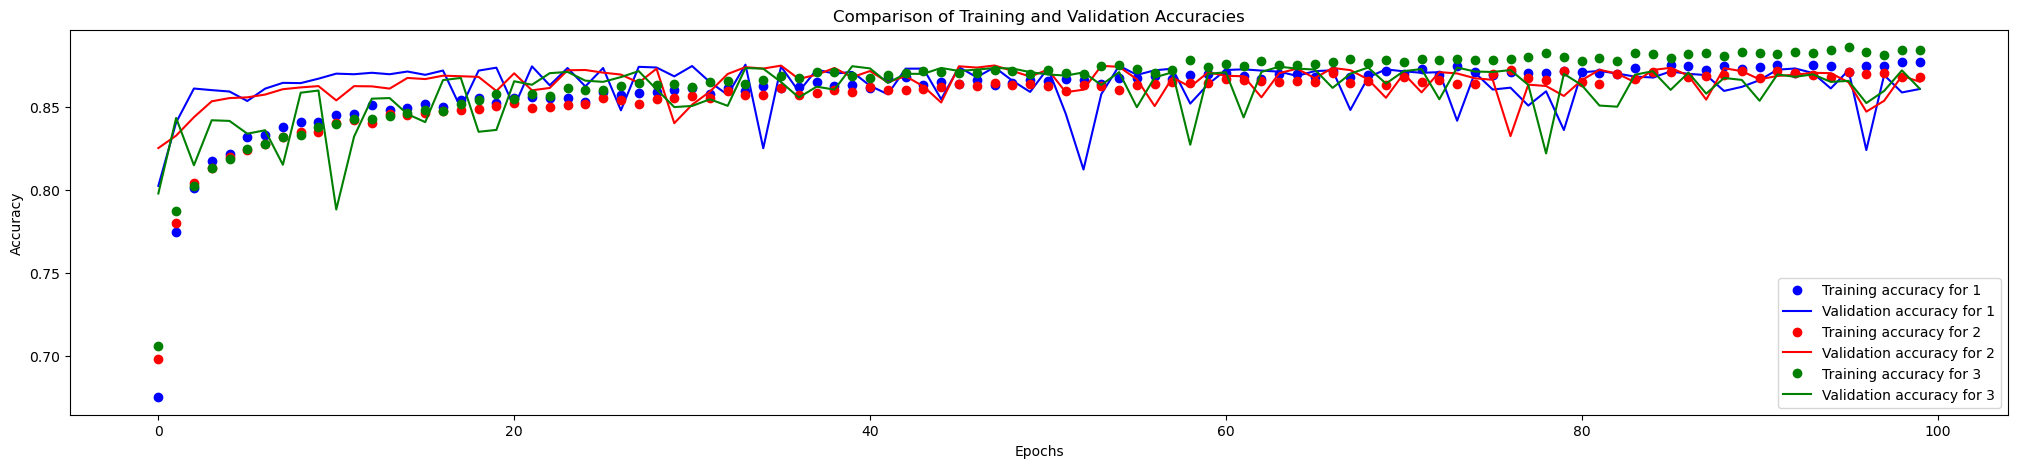

In [41]:
# Compare the accuracies of three training processes
acc1 = history1.history['acc']
val_acc1 = history1.history['val_acc']
acc2 = history2.history['acc']
val_acc2 = history2.history['val_acc']
acc3 = history3.history['acc']
val_acc3 = history3.history['val_acc']

PlotThreeAccuracyComparison(acc1, val_acc1, acc2, val_acc2, acc3, val_acc3, '1', '2', '3')

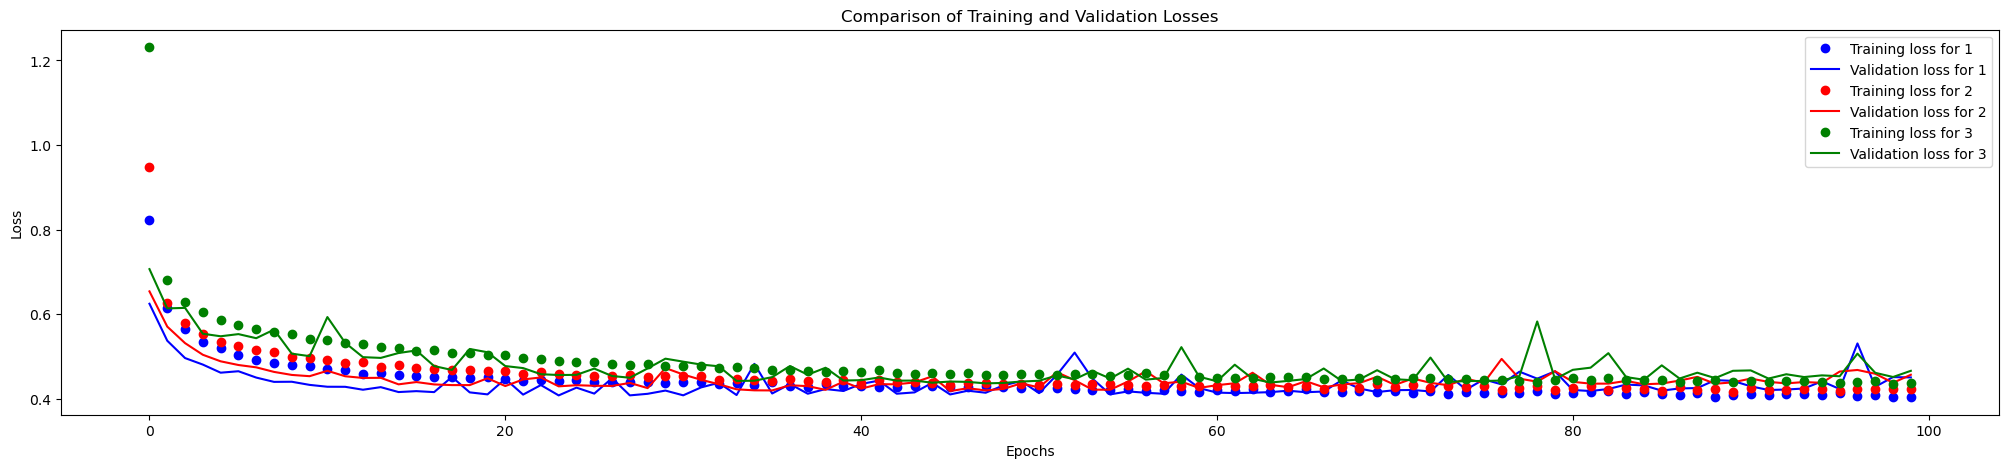

In [42]:
# Compare the losses of three training processes
loss1 = history1.history['loss']
val_loss1 = history1.history['val_loss']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']
loss3 = history3.history['loss']
val_loss3 = history3.history['val_loss']

PlotThreeLossComparison(loss1, val_loss1, loss2, val_loss2, loss3, val_loss3, '1', '2', '3')

In [43]:
argmax1 = np.argmax(val_acc1)
argmax2 = np.argmax(val_acc2)
argmax3 = np.argmax(val_acc3)
print ('Max accuracy for model 1 is: ', val_acc1[argmax1], ', achieved in the ', argmax1 , 'epoch.')
print ('Max accuracy for model 2 is: ', val_acc2[argmax2], ', achieved in the ', argmax2 , 'epoch.')
print ('Max accuracy for model 3 is: ', val_acc3[argmax3], ', achieved in the ', argmax3 , 'epoch.')

Max accuracy for model 1 is:  0.8757200241088867 , achieved in the  33 epoch.
Max accuracy for model 2 is:  0.8751999735832214 , achieved in the  47 epoch.
Max accuracy for model 3 is:  0.8747599720954895 , achieved in the  39 epoch.


## Assignments (3 points)

* Experiment with the model capacity (changing the number of layers, neurons in layers) and conclude about it, trying to find a model which will achieve still better validation accuracy and loss than those presented here.
* Experiment with regularization parameters and various regularizers to achieve still better validation accuracy and loss than those presented here.
* Show comparisons of the performances of the models and describe your conclusions.
* Try to perform such experiments on a different training dataset, downloaded from <a href="www.kaggle.com">Kaggle.com</a> and fight with overfitting and underfitting.

Send me back the notebook with your solution, presenting your experiments and results in a separate notebook.

In [1]:
import tensorflow as tf

print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

2024-04-10 20:44:47.993200: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


Num GPUs Available:  0


2024-04-10 20:44:49.863995: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2024-04-10 20:44:49.865086: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2024-04-10 20:44:49.873681: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2024-04-10 20:44:49.873717: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: i
2024-04-10 20:44:49.873727: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: i
2024-04-10 20:44:49.873832: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 535.161.7
2024-04-10 20:44:49.873869: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 535.161.7
2024-04-10 20:44:49.873878: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:310] kernel ve

In [2]:
!nvidia-smi

Wed Apr 10 20:44:50 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.161.07             Driver Version: 535.161.07   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce MX150           On  | 00000000:01:00.0 Off |                  N/A |
| N/A   45C    P8              N/A / ERR! |      4MiB /  2048MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

### Preprocessing

First of all I tried to better understand data preprocessing and vectorization: so I looked at dimensions of data and word_index dict - mapping from word to corresponding value (occurance frequency of the word)

In [3]:
# import imdb
from keras.datasets import imdb

num_top_words=2000

start_char = 1
oov_char = 2
index_from = 3

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=num_top_words, start_char=start_char, oov_char=oov_char, index_from=index_from)

word_index = imdb.get_word_index()

train_data, train_labels, word_index

<__array_function__ internals>:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/home/ignatella/anaconda3/envs/ML/lib/python3.9/site-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/home/ignatella/anaconda3/envs/ML/lib/python3.9/site-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different leng

(array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 1920, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]),
        list([1, 194, 1153, 194, 2, 78, 228, 5, 6, 1463, 2, 2, 134, 26, 4, 715, 8, 118, 16

In [4]:
# inverse word index
index_word = {v + index_from: k for k, v in word_index.items()}

# add special tokens
index_word[start_char] = "[START]"
index_word[oov_char] = "[OOV]"

# order by key
index_word = dict(sorted(index_word.items()))

# show first 20 items
list(index_word.items())[:20]

[(1, '[START]'),
 (2, '[OOV]'),
 (4, 'the'),
 (5, 'and'),
 (6, 'a'),
 (7, 'of'),
 (8, 'to'),
 (9, 'is'),
 (10, 'br'),
 (11, 'in'),
 (12, 'it'),
 (13, 'i'),
 (14, 'this'),
 (15, 'that'),
 (16, 'was'),
 (17, 'as'),
 (18, 'for'),
 (19, 'with'),
 (20, 'movie'),
 (21, 'but')]

Interesting thing there: there are special characters in the comment: `oov` character for not included words (as we have loaded not all), `start` character used as starting character of every comment. 

In [5]:
# decode first review 
decoded_review = ' '.join([index_word.get(i, '[OOV]') for i in train_data[0]])
decoded_review

"[START] this film was just brilliant casting location scenery story direction [OOV] really [OOV] the part they played and you could just imagine being there robert [OOV] is an amazing actor and now the same being director [OOV] father came from the same [OOV] island as myself so i loved the fact there was a real [OOV] with this film the witty [OOV] throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for [OOV] and would recommend it to everyone to watch and the [OOV] [OOV] was amazing really [OOV] at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also [OOV] to the two little [OOV] that played the [OOV] of [OOV] and paul they were just brilliant children are often left out of the [OOV] list i think because the stars that play them all [OOV] up are such a big [OOV] for the whole film but these children are amazing and should be [OOV] for what they have done don

Then i wanted to look at sample comment. As we see it starts with `[Start]` and has `[OOV]` characters.

In [6]:
# now we see that we can remove all special tokens from train and test data

train_data = [[i for i in review if i > index_from] for review in train_data]
test_data = [[i for i in review if i > index_from] for review in test_data]

I thought that those special characters are not important and removed them

In [7]:
decoded_review = ' '.join([index_word.get(i, '[OOV]') for i in train_data[0]])
decoded_review

"this film was just brilliant casting location scenery story direction really the part they played and you could just imagine being there robert is an amazing actor and now the same being director father came from the same island as myself so i loved the fact there was a real with this film the witty throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for and would recommend it to everyone to watch and the was amazing really at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also to the two little that played the of and paul they were just brilliant children are often left out of the list i think because the stars that play them all up are such a big for the whole film but these children are amazing and should be for what they have done don't you think the whole story was so lovely because it was true and was life after all that was with us all"

Comment after special character removal

In [8]:
# find the longest review 

max_train_len = max([len(review) for review in train_data])
max_test_len = max([len(review) for review in test_data])
max_review_len = max(max_train_len, max_test_len)
max_train_len, max_test_len

(1711, 1948)

Currently the longest comment has 1948 chars length

In [9]:
# get index of the longest test review

i = [len(review) for review in test_data].index(max_test_len)

# decode the longest test review
decoded_review = ' '.join([index_word.get(i, '[OOV]') for i in test_data[i]])
i, decoded_review

(20338,
 "there's a sign on the lost that says br br major spoilers ahead br br but you already knew that didn't you br br since there's a great deal of people that apparently did not get the point of this movie i'd like to my of why the plot makes perfect sense as others have out one single viewing of this movie is not if you have the dvd of you can by looking at david top 10 to but only upon second or third viewing please br br first of all drive is brilliant a masterpiece this is the kind of movie that to leave your head not often are the comments on the very accurate but it gets inside your head and there really hit the mark br br david deserves for creating a movie that not only has a beautifully look to it cinematography wise has great acting a soundtrack by and a very dream like quality to it but on top of it all it also manages to the viewer in such a way that few movies have before after all when is the last time you saw a movie that just wouldn't leave your mind and that ever

In [10]:
from nltk.corpus import stopwords
from nltk.stem.porter import *

In [11]:
# show top 10 stopwords 

stopwords.words('english')[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

Then my idea was that therea not important words that do not affect sentiment, so we name them 'stopwords' and just remove from the dataset.

In [12]:
# remove stopwords from train and test data

stop_words = set(stopwords.words('english'))

train_data = [[i for i in review if index_word.get(i, '[OOV]') not in stop_words] for review in train_data]
test_data = [[i for i in review if index_word.get(i, '[OOV]') not in stop_words] for review in test_data]

In [13]:
# show first review

decoded_review = ' '.join([index_word.get(i, '[OOV]') for i in train_data[0]])
decoded_review

'film brilliant casting location scenery story direction really part played could imagine robert amazing actor director father came island loved fact real film witty throughout film great brilliant much bought film soon released would recommend everyone watch amazing really end sad know say cry film must good definitely also two little played paul brilliant children often left list think stars play big whole film children amazing done think whole story lovely true life us'

In [14]:
max_train_len = max([len(review) for review in train_data])
max_test_len = max([len(review) for review in test_data])
max_review_len = max(max_train_len, max_test_len)
max_train_len, max_test_len

(679, 814)

Now the longest comment has more than 2 times less characters

In [15]:
import numpy as np

def vectorize_sequences(sequences, dimension):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        # set specific indices of results[i] to 1s
        results[i, sequence] = 1.
    return results

def vectorize_data_float_labels(data, labels, dimension):
    # Our vectorized training data
    x = vectorize_sequences(data, dimension)
    # Our vectorized labels
    y = np.asarray(labels).astype('float32')
    return x, y

In [16]:
x_train, y_train  = vectorize_data_float_labels(train_data, train_labels, num_top_words)
x_val, y_val = vectorize_data_float_labels(test_data, test_labels, num_top_words)

In [17]:
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

Then we vectorize sequence as before...

### Model baseline

In [18]:
import keras
from keras import layers, models
import matplotlib.pyplot as plt
import time

class Model():
    def __init__(self, model_factory):
        self.model = model_factory()
        self.history = None

    def train(self, trainX, trainy, testX, testy, epochs, batch_size, learning_rate):
        
        train_start = time.time()

        self.model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
        
        self.history = self.model.fit(trainX, trainy, epochs=epochs, batch_size=batch_size, verbose=2,
                       validation_data=(testX, testy), callbacks=[])

        train_end = time.time()
        print('Training time:', train_end - train_start, 'seconds')

        return self.history

    def plot(self, title): 
        # plot 2 charts in one row, one for accuracy, the second one for loss
        fig, axs = plt.subplots(1, 2, figsize=(15, 5))

        # summarize history for accuracy
        axs[0].plot(self.history.history['accuracy'])
        axs[0].plot(self.history.history['val_accuracy'])
        axs[0].set_title('model accuracy')
        axs[0].set_ylabel('accuracy')
        axs[0].set_xlabel('epoch')
        axs[0].legend(['train', 'test'], loc='upper left')

        # summarize history for loss
        axs[1].plot(self.history.history['loss'])
        axs[1].plot(self.history.history['val_loss'])
        axs[1].set_title('model loss')
        axs[1].set_ylabel('loss')
        axs[1].set_xlabel('epoch')
        axs[1].legend(['train', 'test'], loc='upper left')

        fig.suptitle(title)

        plt.show()
        
    def evaluate(self, testX, testy):
        result = self.model.evaluate(testX, testy, verbose=0)
        print('Final Validation loss:', result[0], 'Validation accuracy:', result[1])
        return result

    def print_best_epoch(self):
        best_epoch = np.argmax(self.history.history['val_accuracy'])
        print('Best val accuracy:', self.history.history['val_accuracy'][best_epoch], 'at epoch', best_epoch)

2024-04-10 20:44:58.343434: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-10 20:44:58.343933: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2024-04-10 20:44:58.793927: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2024-04-10 20:44:58.794257: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 1999965000 Hz


Epoch 1/100
98/98 - 1s - loss: 0.4666 - accuracy: 0.8031 - val_loss: 0.3305 - val_accuracy: 0.8683
Epoch 2/100
98/98 - 0s - loss: 0.2929 - accuracy: 0.8850 - val_loss: 0.3049 - val_accuracy: 0.8733
Epoch 3/100
98/98 - 0s - loss: 0.2692 - accuracy: 0.8925 - val_loss: 0.3101 - val_accuracy: 0.8706
Epoch 4/100
98/98 - 0s - loss: 0.2583 - accuracy: 0.8971 - val_loss: 0.3178 - val_accuracy: 0.8674
Epoch 5/100
98/98 - 0s - loss: 0.2497 - accuracy: 0.9005 - val_loss: 0.3232 - val_accuracy: 0.8667
Epoch 6/100
98/98 - 0s - loss: 0.2389 - accuracy: 0.9040 - val_loss: 0.3323 - val_accuracy: 0.8656
Epoch 7/100
98/98 - 0s - loss: 0.2275 - accuracy: 0.9095 - val_loss: 0.3388 - val_accuracy: 0.8626
Epoch 8/100
98/98 - 0s - loss: 0.2144 - accuracy: 0.9161 - val_loss: 0.3462 - val_accuracy: 0.8633
Epoch 9/100
98/98 - 0s - loss: 0.2010 - accuracy: 0.9220 - val_loss: 0.3643 - val_accuracy: 0.8588
Epoch 10/100
98/98 - 0s - loss: 0.1882 - accuracy: 0.9275 - val_loss: 0.3683 - val_accuracy: 0.8592
Epoch 11/

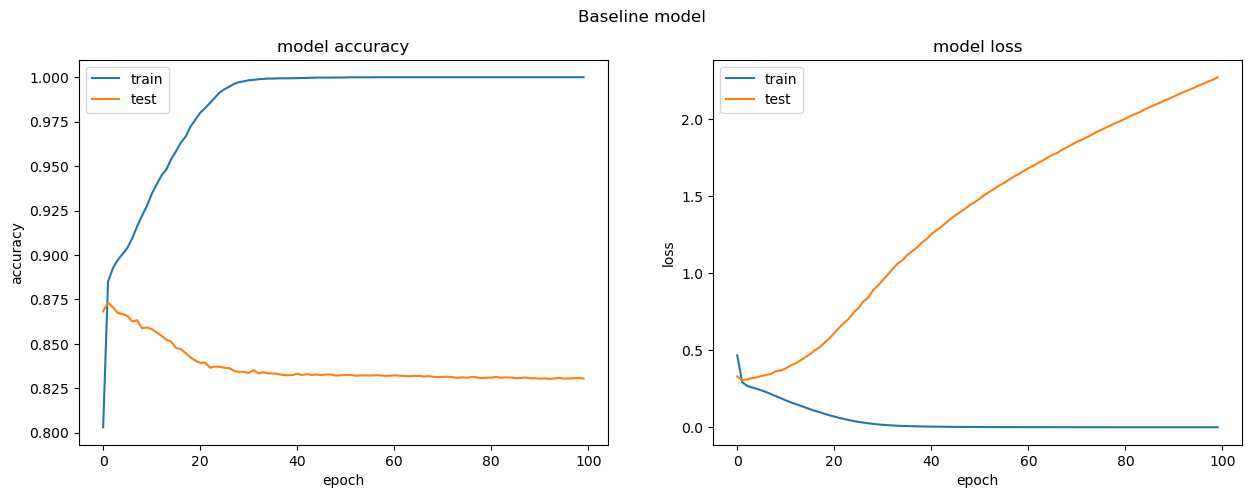

Best val accuracy: 0.8732799887657166 at epoch 1
Final Validation loss: 2.270935535430908 Validation accuracy: 0.8304799795150757


In [19]:
# train model

def baseline_model():
    model = models.Sequential()
    model.add(layers.Dense(16, activation='relu', input_shape=(num_top_words,)))
    model.add(layers.Dense(8, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))

    return model

model = Model(model_factory=baseline_model)
model.train(x_train, y_train, x_val, y_val, epochs=100, batch_size=256, learning_rate=0.001)
model.plot('Baseline model')
model.print_best_epoch()
model.evaluate(x_val, y_val);

This is our baseline model, I would say it has giant overfitting, validation accuracy is also comparably low: 83%.

### Simple model (optimizing capacity)

Epoch 1/100
98/98 - 1s - loss: 0.4831 - accuracy: 0.7924 - val_loss: 0.3492 - val_accuracy: 0.8646
Epoch 2/100
98/98 - 0s - loss: 0.3067 - accuracy: 0.8814 - val_loss: 0.3087 - val_accuracy: 0.8738
Epoch 3/100
98/98 - 0s - loss: 0.2756 - accuracy: 0.8917 - val_loss: 0.3042 - val_accuracy: 0.8739
Epoch 4/100
98/98 - 0s - loss: 0.2638 - accuracy: 0.8956 - val_loss: 0.3096 - val_accuracy: 0.8710
Epoch 5/100
98/98 - 0s - loss: 0.2582 - accuracy: 0.8962 - val_loss: 0.3133 - val_accuracy: 0.8678
Epoch 6/100
98/98 - 0s - loss: 0.2532 - accuracy: 0.8985 - val_loss: 0.3173 - val_accuracy: 0.8680
Epoch 7/100
98/98 - 0s - loss: 0.2519 - accuracy: 0.8982 - val_loss: 0.3222 - val_accuracy: 0.8651
Epoch 8/100
98/98 - 0s - loss: 0.2498 - accuracy: 0.9001 - val_loss: 0.3258 - val_accuracy: 0.8652
Epoch 9/100
98/98 - 0s - loss: 0.2482 - accuracy: 0.8986 - val_loss: 0.3309 - val_accuracy: 0.8639
Epoch 10/100
98/98 - 0s - loss: 0.2483 - accuracy: 0.8997 - val_loss: 0.3317 - val_accuracy: 0.8635
Epoch 11/

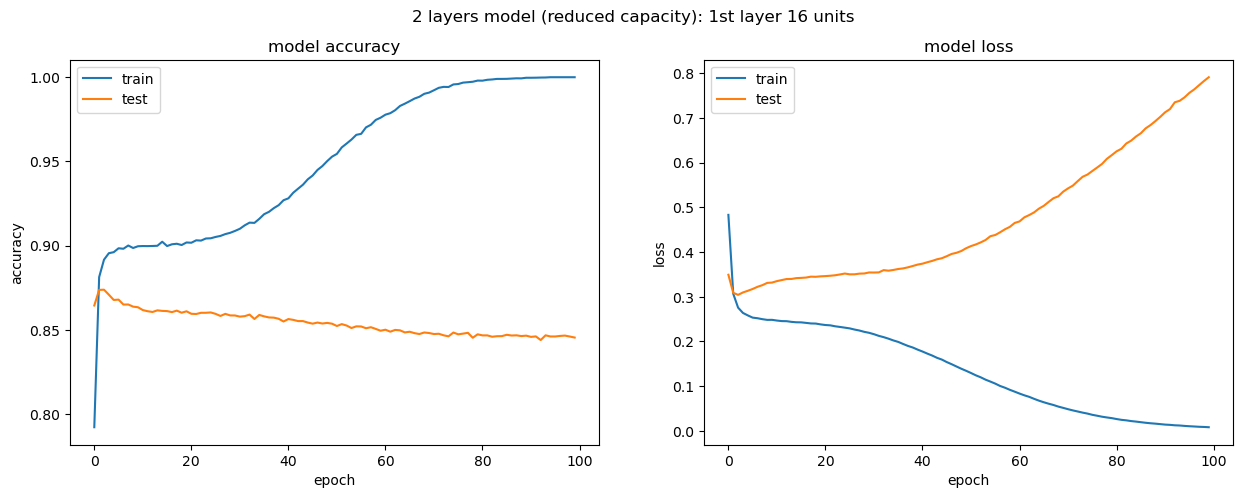

Best val accuracy: 0.8739200234413147 at epoch 2
Final Validation loss: 0.7909847497940063 Validation accuracy: 0.8455600142478943


In [20]:
def simple_model():
    model = models.Sequential()
    model.add(layers.Dense(16, activation='relu', input_shape=(num_top_words,)))
    model.add(layers.Dense(1, activation='sigmoid'))

    return model


model = Model(model_factory=simple_model)
model.train(x_train, y_train, x_val, y_val, epochs=100, batch_size=256, learning_rate=0.001)
model.plot('2 layers model (reduced capacity): 1st layer 16 units')
model.print_best_epoch()
model.evaluate(x_val, y_val);

The first idea is to just simplify model: reduce number of layers and number of neurons in the layer. There we see slight improve but still big overfitting.

Epoch 1/100
98/98 - 1s - loss: 0.5038 - accuracy: 0.7849 - val_loss: 0.3723 - val_accuracy: 0.8608
Epoch 2/100
98/98 - 0s - loss: 0.3241 - accuracy: 0.8784 - val_loss: 0.3176 - val_accuracy: 0.8717
Epoch 3/100
98/98 - 0s - loss: 0.2848 - accuracy: 0.8887 - val_loss: 0.3062 - val_accuracy: 0.8744
Epoch 4/100
98/98 - 0s - loss: 0.2694 - accuracy: 0.8937 - val_loss: 0.3050 - val_accuracy: 0.8734
Epoch 5/100
98/98 - 0s - loss: 0.2607 - accuracy: 0.8974 - val_loss: 0.3102 - val_accuracy: 0.8703
Epoch 6/100
98/98 - 0s - loss: 0.2558 - accuracy: 0.8970 - val_loss: 0.3121 - val_accuracy: 0.8696
Epoch 7/100
98/98 - 0s - loss: 0.2523 - accuracy: 0.8999 - val_loss: 0.3155 - val_accuracy: 0.8686
Epoch 8/100
98/98 - 0s - loss: 0.2502 - accuracy: 0.8994 - val_loss: 0.3210 - val_accuracy: 0.8674
Epoch 9/100
98/98 - 0s - loss: 0.2484 - accuracy: 0.8994 - val_loss: 0.3243 - val_accuracy: 0.8648
Epoch 10/100
98/98 - 0s - loss: 0.2474 - accuracy: 0.9004 - val_loss: 0.3282 - val_accuracy: 0.8649
Epoch 11/

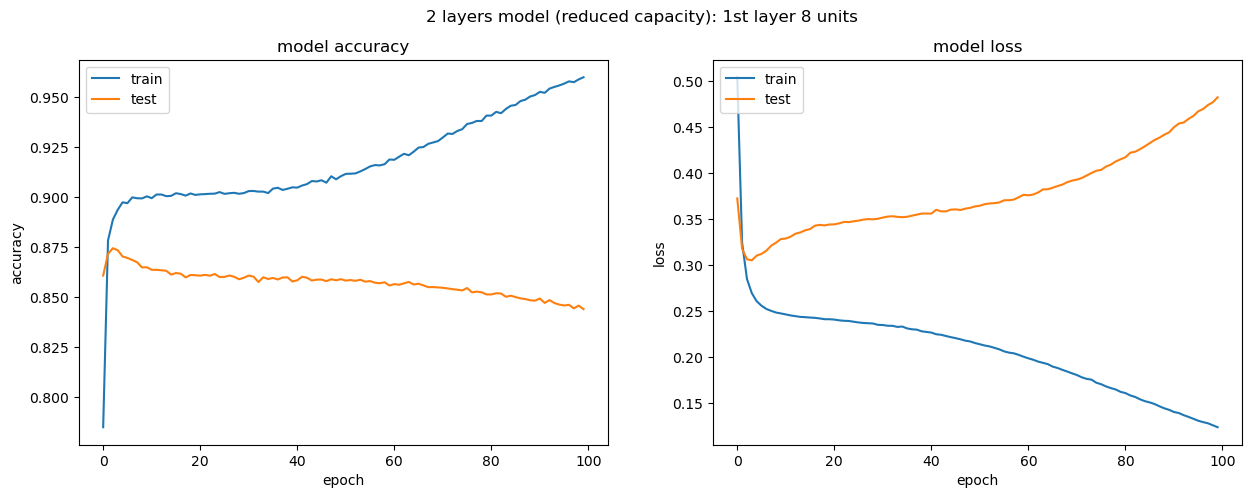

Best val accuracy: 0.8744400143623352 at epoch 2
Final Validation loss: 0.48201408982276917 Validation accuracy: 0.8439599871635437


In [21]:
def simple_model():
    model = models.Sequential()
    model.add(layers.Dense(8, activation='relu', input_shape=(num_top_words,)))
    model.add(layers.Dense(1, activation='sigmoid'))

    return model


model = Model(model_factory=simple_model)
model.train(x_train, y_train, x_val, y_val, epochs=100, batch_size=256, learning_rate=0.001)
model.plot('2 layers model (reduced capacity): 1st layer 8 units')
model.print_best_epoch()
model.evaluate(x_val, y_val);

Even more simlified model still overfitts, but we are moving in the right direction! 

Epoch 1/100
98/98 - 1s - loss: 0.6398 - accuracy: 0.6604 - val_loss: 0.5708 - val_accuracy: 0.7844
Epoch 2/100
98/98 - 0s - loss: 0.5293 - accuracy: 0.8214 - val_loss: 0.5088 - val_accuracy: 0.8370
Epoch 3/100
98/98 - 0s - loss: 0.4789 - accuracy: 0.8554 - val_loss: 0.4747 - val_accuracy: 0.8470
Epoch 4/100
98/98 - 0s - loss: 0.4455 - accuracy: 0.8710 - val_loss: 0.4497 - val_accuracy: 0.8593
Epoch 5/100
98/98 - 0s - loss: 0.4198 - accuracy: 0.8819 - val_loss: 0.4308 - val_accuracy: 0.8650
Epoch 6/100
98/98 - 0s - loss: 0.3993 - accuracy: 0.8880 - val_loss: 0.4157 - val_accuracy: 0.8680
Epoch 7/100
98/98 - 0s - loss: 0.3817 - accuracy: 0.8924 - val_loss: 0.4037 - val_accuracy: 0.8685
Epoch 8/100
98/98 - 0s - loss: 0.3663 - accuracy: 0.8958 - val_loss: 0.3924 - val_accuracy: 0.8710
Epoch 9/100
98/98 - 0s - loss: 0.3536 - accuracy: 0.8966 - val_loss: 0.3839 - val_accuracy: 0.8718
Epoch 10/100
98/98 - 0s - loss: 0.3420 - accuracy: 0.8988 - val_loss: 0.3772 - val_accuracy: 0.8714
Epoch 11/

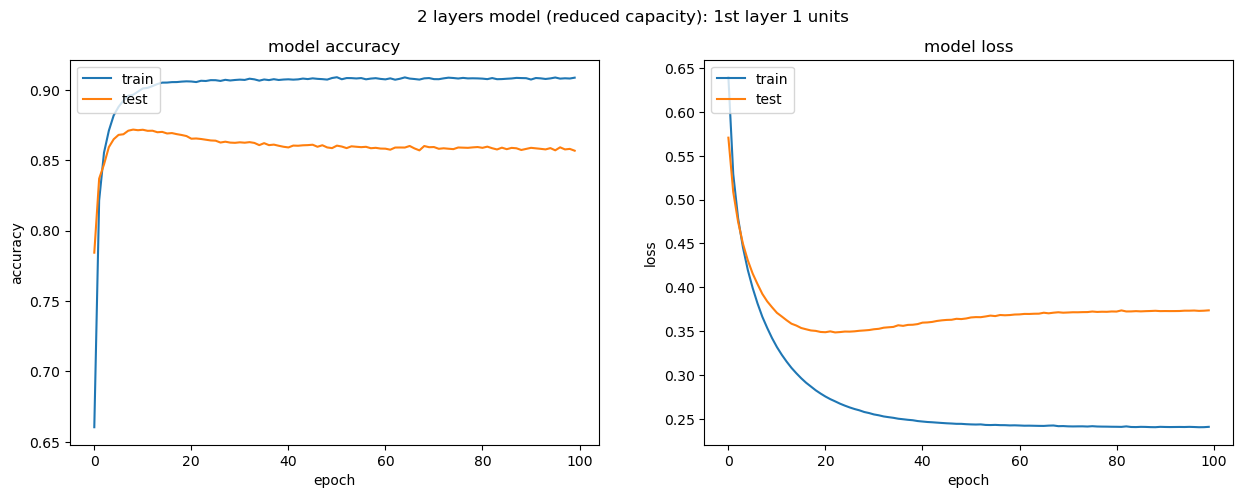

Best val accuracy: 0.8718000054359436 at epoch 8
Final Validation loss: 0.37369346618652344 Validation accuracy: 0.8568000197410583


In [22]:
def simple_model():
    model = models.Sequential()
    model.add(layers.Dense(1, activation='relu', input_shape=(num_top_words,)))
    model.add(layers.Dense(1, activation='sigmoid'))

    return model


model = Model(model_factory=simple_model)
model.train(x_train, y_train, x_val, y_val, epochs=100, batch_size=256, learning_rate=0.001)
model.plot('2 layers model (reduced capacity): 1st layer 1 units')
model.print_best_epoch()
model.evaluate(x_val, y_val);

Even less neurons and still overfitting, but now it doesn't rises so fast. 

Epoch 1/100
98/98 - 1s - loss: 1.5442 - accuracy: 0.5665 - val_loss: 1.0004 - val_accuracy: 0.6278
Epoch 2/100
98/98 - 0s - loss: 0.8442 - accuracy: 0.6692 - val_loss: 0.7685 - val_accuracy: 0.6976
Epoch 3/100
98/98 - 0s - loss: 0.6562 - accuracy: 0.7270 - val_loss: 0.6637 - val_accuracy: 0.7378
Epoch 4/100
98/98 - 0s - loss: 0.5798 - accuracy: 0.7570 - val_loss: 0.6191 - val_accuracy: 0.7676
Epoch 5/100
98/98 - 0s - loss: 0.5265 - accuracy: 0.7813 - val_loss: 0.5835 - val_accuracy: 0.7732
Epoch 6/100
98/98 - 0s - loss: 0.5008 - accuracy: 0.7948 - val_loss: 0.5517 - val_accuracy: 0.7926
Epoch 7/100
98/98 - 0s - loss: 0.4727 - accuracy: 0.8085 - val_loss: 0.5462 - val_accuracy: 0.8032
Epoch 8/100
98/98 - 0s - loss: 0.4482 - accuracy: 0.8196 - val_loss: 0.5370 - val_accuracy: 0.8110
Epoch 9/100
98/98 - 0s - loss: 0.4291 - accuracy: 0.8290 - val_loss: 0.5240 - val_accuracy: 0.8187
Epoch 10/100
98/98 - 0s - loss: 0.4153 - accuracy: 0.8370 - val_loss: 0.5093 - val_accuracy: 0.8230
Epoch 11/

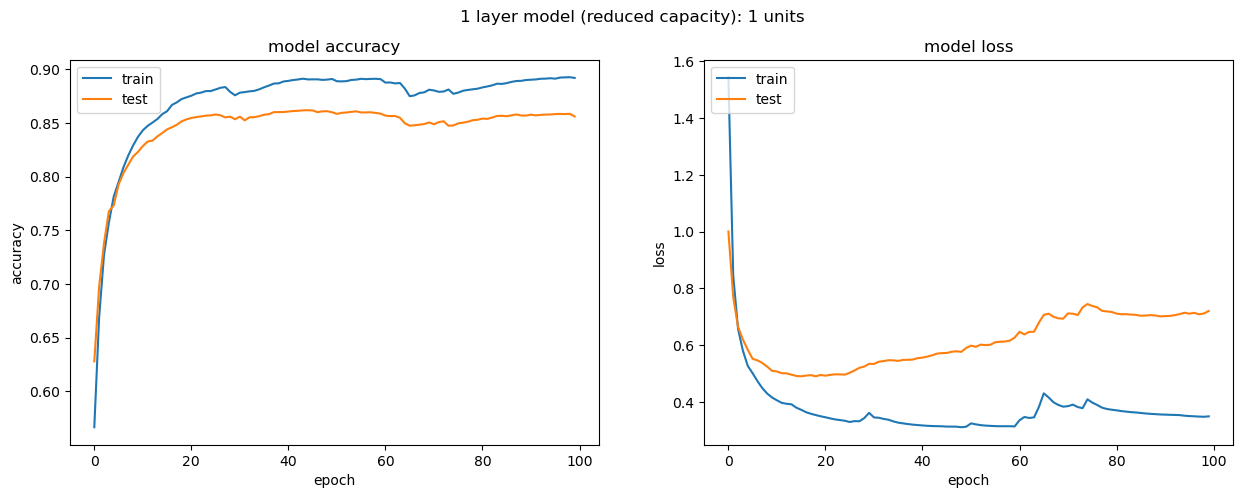

Best val accuracy: 0.8618000149726868 at epoch 44
Final Validation loss: 0.7202286720275879 Validation accuracy: 0.8560400009155273


In [23]:
def simple_model():
    model = models.Sequential()
    model.add(layers.Dense(1, activation='relu', input_shape=(num_top_words,)))

    return model


model = Model(model_factory=simple_model)
model.train(x_train, y_train, x_val, y_val, epochs=100, batch_size=256, learning_rate=0.001)
model.plot('1 layer model (reduced capacity): 1 units')
model.print_best_epoch()
model.evaluate(x_val, y_val);

The most simple model still overfitts, so we need something more.... regularization!!!

### Regularization

Epoch 1/100
98/98 - 1s - loss: 0.8492 - accuracy: 0.7868 - val_loss: 0.5479 - val_accuracy: 0.8532
Epoch 2/100
98/98 - 0s - loss: 0.5063 - accuracy: 0.8584 - val_loss: 0.4882 - val_accuracy: 0.8565
Epoch 3/100
98/98 - 0s - loss: 0.4661 - accuracy: 0.8670 - val_loss: 0.4631 - val_accuracy: 0.8610
Epoch 4/100
98/98 - 0s - loss: 0.4467 - accuracy: 0.8702 - val_loss: 0.4499 - val_accuracy: 0.8679
Epoch 5/100
98/98 - 0s - loss: 0.4338 - accuracy: 0.8737 - val_loss: 0.4417 - val_accuracy: 0.8674
Epoch 6/100
98/98 - 0s - loss: 0.4242 - accuracy: 0.8754 - val_loss: 0.4329 - val_accuracy: 0.8710
Epoch 7/100
98/98 - 0s - loss: 0.4155 - accuracy: 0.8795 - val_loss: 0.4254 - val_accuracy: 0.8704
Epoch 8/100
98/98 - 0s - loss: 0.4063 - accuracy: 0.8814 - val_loss: 0.4226 - val_accuracy: 0.8698
Epoch 9/100
98/98 - 0s - loss: 0.4026 - accuracy: 0.8812 - val_loss: 0.4197 - val_accuracy: 0.8722
Epoch 10/100
98/98 - 0s - loss: 0.3975 - accuracy: 0.8830 - val_loss: 0.4130 - val_accuracy: 0.8732
Epoch 11/

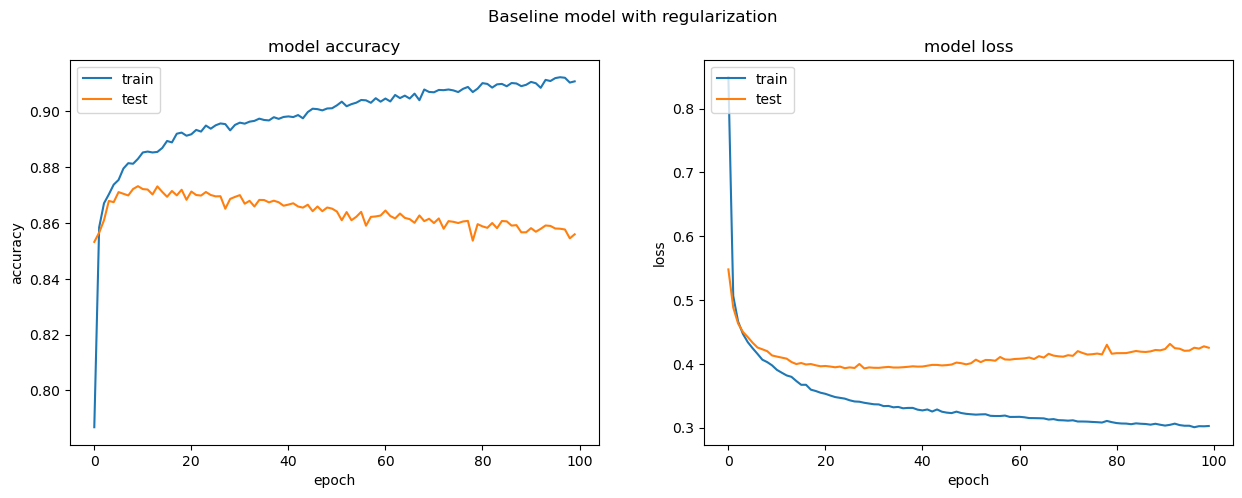

Best val accuracy: 0.8731600046157837 at epoch 9
Final Validation loss: 0.42508047819137573 Validation accuracy: 0.8559200167655945


In [24]:
def regulized_model():
    model = models.Sequential()
    model.add(layers.Dense(16, kernel_regularizer=keras.regularizers.l1(0.001), activation='relu', input_shape=(num_top_words,)))
    model.add(layers.Dense(8, kernel_regularizer=keras.regularizers.l1(0.001), activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))

    return model

model = Model(model_factory=regulized_model)
model.train(x_train, y_train, x_val, y_val, epochs=100, batch_size=256, learning_rate=0.001)
model.plot('Baseline model with regularization')
model.print_best_epoch()
model.evaluate(x_val, y_val);

Our baseline model with regularization still overfits, but the validation loss slope is not so big.

Epoch 1/100
98/98 - 1s - loss: 0.8208 - accuracy: 0.8054 - val_loss: 0.5398 - val_accuracy: 0.8487
Epoch 2/100
98/98 - 0s - loss: 0.5099 - accuracy: 0.8525 - val_loss: 0.4952 - val_accuracy: 0.8496
Epoch 3/100
98/98 - 0s - loss: 0.4842 - accuracy: 0.8530 - val_loss: 0.4795 - val_accuracy: 0.8518
Epoch 4/100
98/98 - 0s - loss: 0.4725 - accuracy: 0.8550 - val_loss: 0.4719 - val_accuracy: 0.8535
Epoch 5/100
98/98 - 0s - loss: 0.4639 - accuracy: 0.8566 - val_loss: 0.4645 - val_accuracy: 0.8538
Epoch 6/100
98/98 - 0s - loss: 0.4584 - accuracy: 0.8592 - val_loss: 0.4602 - val_accuracy: 0.8554
Epoch 7/100
98/98 - 0s - loss: 0.4507 - accuracy: 0.8621 - val_loss: 0.4514 - val_accuracy: 0.8606
Epoch 8/100
98/98 - 0s - loss: 0.4463 - accuracy: 0.8643 - val_loss: 0.4462 - val_accuracy: 0.8590
Epoch 9/100
98/98 - 0s - loss: 0.4412 - accuracy: 0.8639 - val_loss: 0.4477 - val_accuracy: 0.8595
Epoch 10/100
98/98 - 0s - loss: 0.4363 - accuracy: 0.8652 - val_loss: 0.4390 - val_accuracy: 0.8614
Epoch 11/

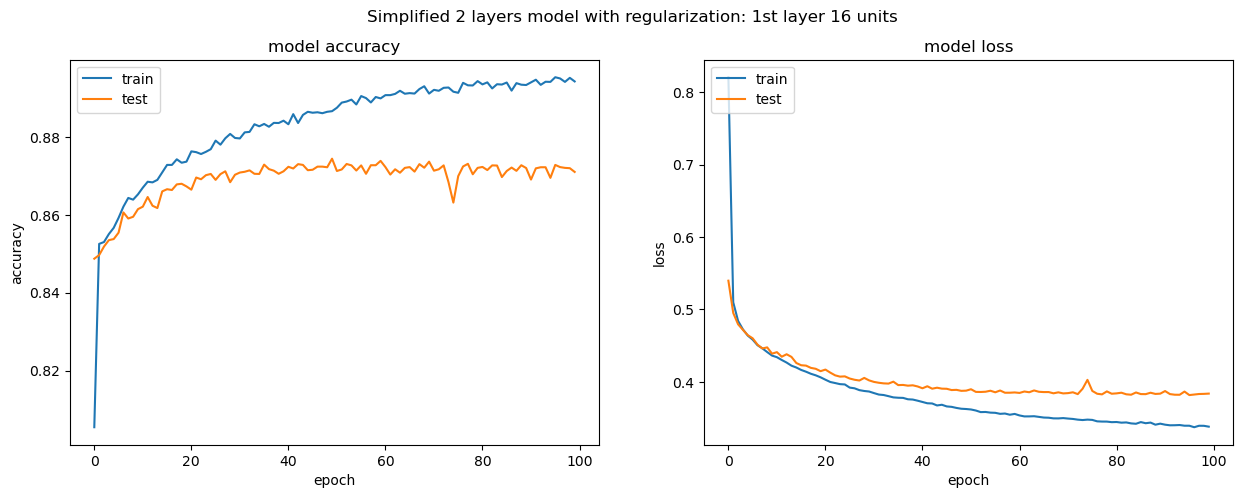

Best val accuracy: 0.8744000196456909 at epoch 49
Final Validation loss: 0.3838205337524414 Validation accuracy: 0.8709999918937683


In [25]:
def simple_regulized_model():
    model = models.Sequential()
    model.add(layers.Dense(16, kernel_regularizer=keras.regularizers.l1(0.001), activation='relu', input_shape=(num_top_words,)))
    model.add(layers.Dense(1, activation='sigmoid'))

    return model

model = Model(model_factory=simple_regulized_model)
model.train(x_train, y_train, x_val, y_val, epochs=100, batch_size=256, learning_rate=0.001)
model.plot('Simplified 2 layers model with regularization: 1st layer 16 units')
model.print_best_epoch()
model.evaluate(x_val, y_val);

Simplified model and regularization -- even better results. The first time we achieve 87% accuracy. And the highest validation accuracy at epoch 49: 87.44%.

Epoch 1/100
98/98 - 1s - loss: 0.6729 - accuracy: 0.7668 - val_loss: 0.5332 - val_accuracy: 0.8542
Epoch 2/100
98/98 - 0s - loss: 0.4895 - accuracy: 0.8621 - val_loss: 0.4710 - val_accuracy: 0.8588
Epoch 3/100
98/98 - 0s - loss: 0.4491 - accuracy: 0.8669 - val_loss: 0.4451 - val_accuracy: 0.8641
Epoch 4/100
98/98 - 0s - loss: 0.4304 - accuracy: 0.8700 - val_loss: 0.4324 - val_accuracy: 0.8656
Epoch 5/100
98/98 - 0s - loss: 0.4205 - accuracy: 0.8718 - val_loss: 0.4277 - val_accuracy: 0.8643
Epoch 6/100
98/98 - 0s - loss: 0.4140 - accuracy: 0.8730 - val_loss: 0.4209 - val_accuracy: 0.8647
Epoch 7/100
98/98 - 0s - loss: 0.4086 - accuracy: 0.8721 - val_loss: 0.4162 - val_accuracy: 0.8659
Epoch 8/100
98/98 - 0s - loss: 0.4049 - accuracy: 0.8725 - val_loss: 0.4134 - val_accuracy: 0.8659
Epoch 9/100
98/98 - 0s - loss: 0.4013 - accuracy: 0.8744 - val_loss: 0.4114 - val_accuracy: 0.8667
Epoch 10/100
98/98 - 0s - loss: 0.3983 - accuracy: 0.8748 - val_loss: 0.4089 - val_accuracy: 0.8660
Epoch 11/

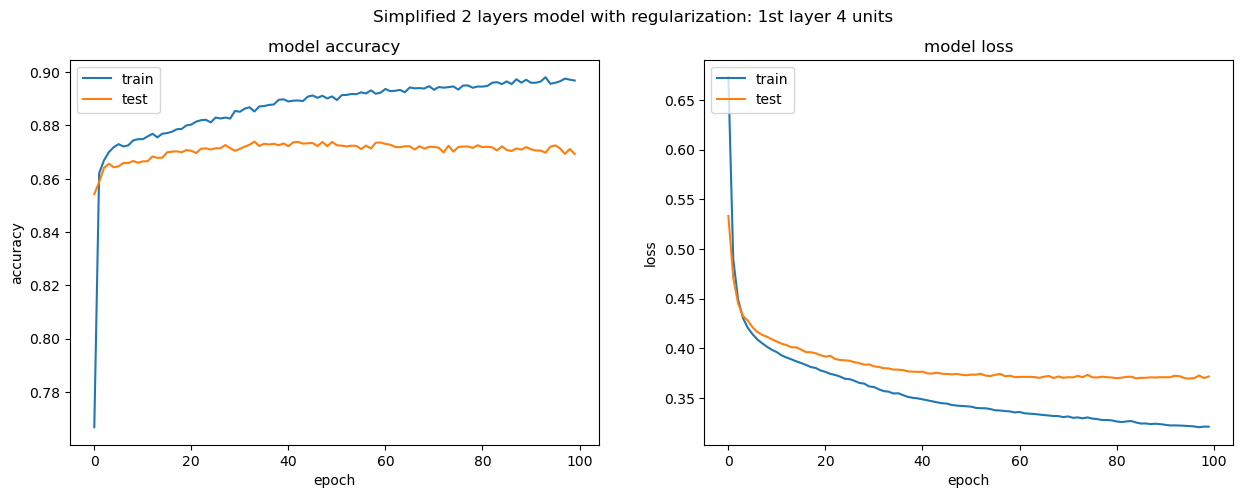

Best val accuracy: 0.8739200234413147 at epoch 33
Final Validation loss: 0.37154409289360046 Validation accuracy: 0.8692799806594849


In [26]:
def simple_regulized_model():
    model = models.Sequential()
    model.add(layers.Dense(4, kernel_regularizer=keras.regularizers.l1(0.001), activation='relu', input_shape=(num_top_words,)))
    model.add(layers.Dense(1, activation='sigmoid'))

    return model

model = Model(model_factory=simple_regulized_model)
model.train(x_train, y_train, x_val, y_val, epochs=100, batch_size=256, learning_rate=0.001)
model.plot('Simplified 2 layers model with regularization: 1st layer 4 units')
model.print_best_epoch()
model.evaluate(x_val, y_val);

Even more simplified model but worse results

Epoch 1/100
98/98 - 1s - loss: 0.6674 - accuracy: 0.6864 - val_loss: 0.5948 - val_accuracy: 0.7832
Epoch 2/100
98/98 - 0s - loss: 0.5617 - accuracy: 0.8174 - val_loss: 0.5437 - val_accuracy: 0.8372
Epoch 3/100
98/98 - 0s - loss: 0.5240 - accuracy: 0.8488 - val_loss: 0.5156 - val_accuracy: 0.8494
Epoch 4/100
98/98 - 0s - loss: 0.4994 - accuracy: 0.8605 - val_loss: 0.4951 - val_accuracy: 0.8568
Epoch 5/100
98/98 - 0s - loss: 0.4805 - accuracy: 0.8686 - val_loss: 0.4793 - val_accuracy: 0.8595
Epoch 6/100
98/98 - 0s - loss: 0.4652 - accuracy: 0.8726 - val_loss: 0.4655 - val_accuracy: 0.8642
Epoch 7/100
98/98 - 0s - loss: 0.4521 - accuracy: 0.8755 - val_loss: 0.4545 - val_accuracy: 0.8659
Epoch 8/100
98/98 - 0s - loss: 0.4411 - accuracy: 0.8781 - val_loss: 0.4449 - val_accuracy: 0.8671
Epoch 9/100
98/98 - 0s - loss: 0.4314 - accuracy: 0.8792 - val_loss: 0.4369 - val_accuracy: 0.8684
Epoch 10/100
98/98 - 0s - loss: 0.4228 - accuracy: 0.8794 - val_loss: 0.4299 - val_accuracy: 0.8692
Epoch 11/

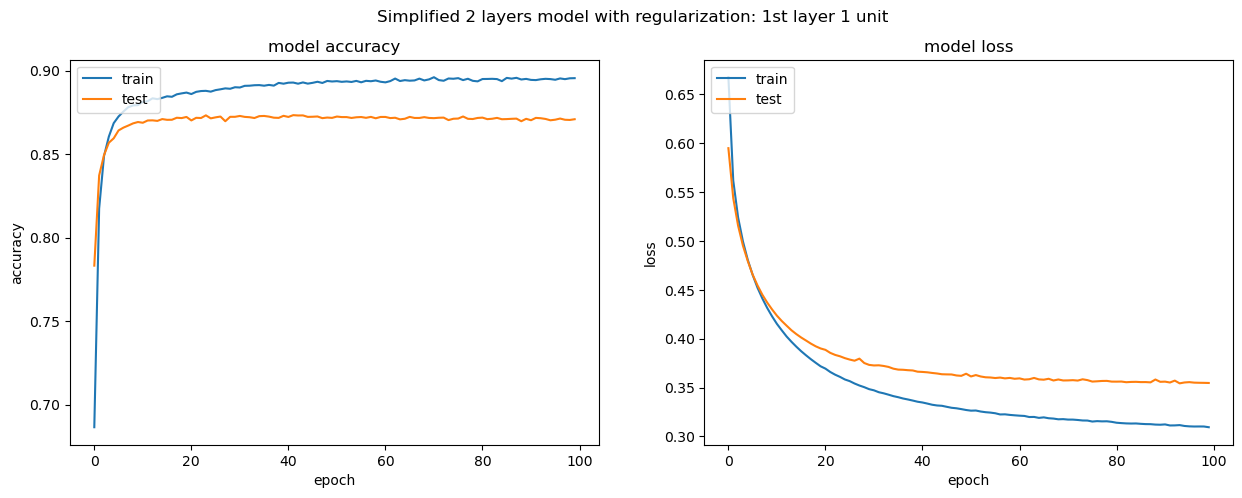

Best val accuracy: 0.8733599781990051 at epoch 41
Final Validation loss: 0.35466212034225464 Validation accuracy: 0.8709200024604797


In [27]:
def simple_regulized_model():
    model = models.Sequential()
    model.add(layers.Dense(1, kernel_regularizer=keras.regularizers.l1(0.001), activation='relu', input_shape=(num_top_words,)))
    model.add(layers.Dense(1, activation='sigmoid'))

    return model

model = Model(model_factory=simple_regulized_model)
model.train(x_train, y_train, x_val, y_val, epochs=100, batch_size=256, learning_rate=0.001)
model.plot('Simplified 2 layers model with regularization: 1st layer 1 unit')
model.print_best_epoch()
model.evaluate(x_val, y_val);

Very simple model and great result from my perspective, no positive slope can be seen for validation loss function, it looks like we could increase number of epochs.

### Dropout

Epoch 1/100
98/98 - 1s - loss: 0.6487 - accuracy: 0.6226 - val_loss: 0.5354 - val_accuracy: 0.8378
Epoch 2/100
98/98 - 0s - loss: 0.5265 - accuracy: 0.7729 - val_loss: 0.4129 - val_accuracy: 0.8630
Epoch 3/100
98/98 - 0s - loss: 0.4527 - accuracy: 0.8231 - val_loss: 0.3536 - val_accuracy: 0.8718
Epoch 4/100
98/98 - 0s - loss: 0.3975 - accuracy: 0.8419 - val_loss: 0.3202 - val_accuracy: 0.8724
Epoch 5/100
98/98 - 0s - loss: 0.3672 - accuracy: 0.8529 - val_loss: 0.3078 - val_accuracy: 0.8702
Epoch 6/100
98/98 - 0s - loss: 0.3453 - accuracy: 0.8645 - val_loss: 0.3044 - val_accuracy: 0.8714
Epoch 7/100
98/98 - 0s - loss: 0.3270 - accuracy: 0.8743 - val_loss: 0.3056 - val_accuracy: 0.8691
Epoch 8/100
98/98 - 0s - loss: 0.3155 - accuracy: 0.8767 - val_loss: 0.3066 - val_accuracy: 0.8710
Epoch 9/100
98/98 - 0s - loss: 0.3103 - accuracy: 0.8832 - val_loss: 0.3106 - val_accuracy: 0.8704
Epoch 10/100
98/98 - 0s - loss: 0.2921 - accuracy: 0.8904 - val_loss: 0.3146 - val_accuracy: 0.8689
Epoch 11/

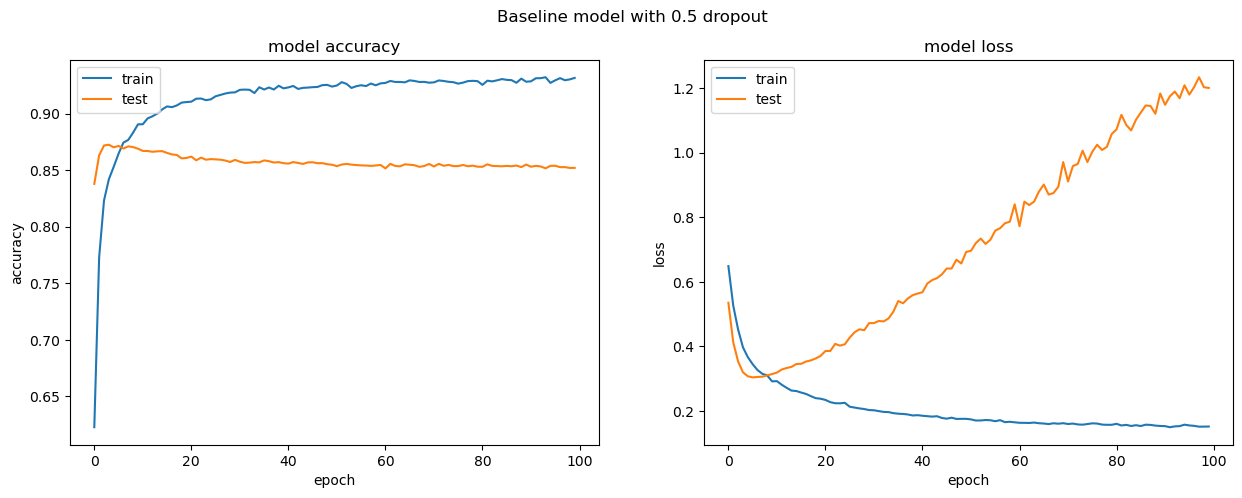

Best val accuracy: 0.872439980506897 at epoch 3
Final Validation loss: 1.2001488208770752 Validation accuracy: 0.8519600033760071


In [28]:
def dropout_model():
    model = models.Sequential()
    model.add(layers.Dense(16, activation='relu', input_shape=(num_top_words,)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(8, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1, activation='sigmoid'))

    return model

model = Model(model_factory=dropout_model)
model.train(x_train, y_train, x_val, y_val, epochs=100, batch_size=256, learning_rate=0.001)
model.plot('Baseline model with 0.5 dropout')
model.print_best_epoch()
model.evaluate(x_val, y_val);

Comparing to baseline model it is slightly better, but only a dropout is not enough

Epoch 1/100
98/98 - 1s - loss: 0.5063 - accuracy: 0.7711 - val_loss: 0.3655 - val_accuracy: 0.8632
Epoch 2/100
98/98 - 0s - loss: 0.3420 - accuracy: 0.8644 - val_loss: 0.3162 - val_accuracy: 0.8733
Epoch 3/100
98/98 - 0s - loss: 0.3004 - accuracy: 0.8810 - val_loss: 0.3040 - val_accuracy: 0.8749
Epoch 4/100
98/98 - 0s - loss: 0.2813 - accuracy: 0.8884 - val_loss: 0.3010 - val_accuracy: 0.8750
Epoch 5/100
98/98 - 0s - loss: 0.2672 - accuracy: 0.8947 - val_loss: 0.3012 - val_accuracy: 0.8745
Epoch 6/100
98/98 - 0s - loss: 0.2567 - accuracy: 0.8980 - val_loss: 0.3021 - val_accuracy: 0.8721
Epoch 7/100
98/98 - 0s - loss: 0.2491 - accuracy: 0.9016 - val_loss: 0.3045 - val_accuracy: 0.8721
Epoch 8/100
98/98 - 0s - loss: 0.2399 - accuracy: 0.9061 - val_loss: 0.3095 - val_accuracy: 0.8703
Epoch 9/100
98/98 - 0s - loss: 0.2336 - accuracy: 0.9075 - val_loss: 0.3100 - val_accuracy: 0.8695
Epoch 10/100
98/98 - 0s - loss: 0.2277 - accuracy: 0.9105 - val_loss: 0.3146 - val_accuracy: 0.8685
Epoch 11/

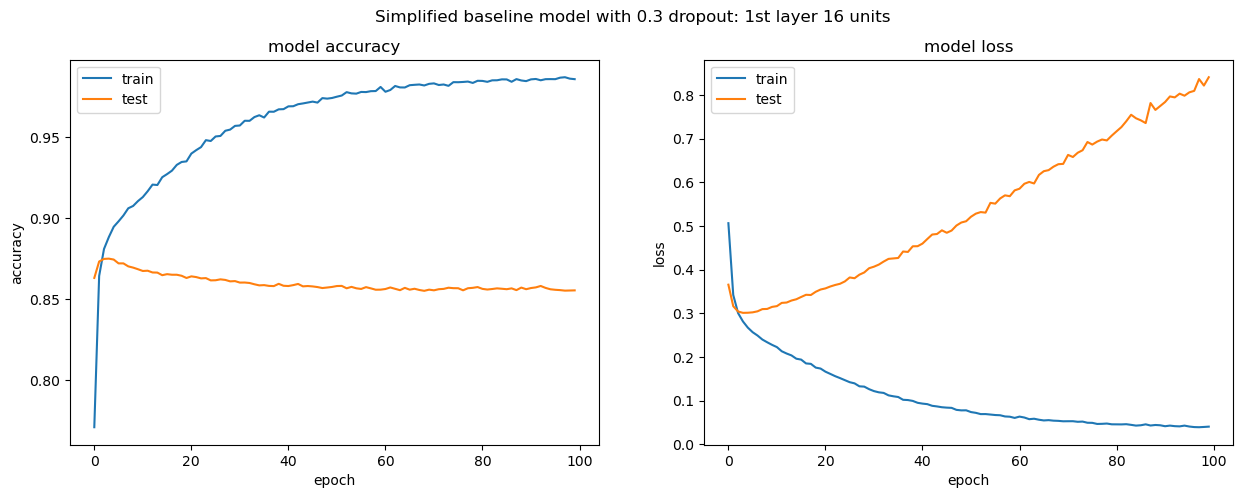

Best val accuracy: 0.8750399947166443 at epoch 3
Final Validation loss: 0.8404257893562317 Validation accuracy: 0.8554800152778625


In [30]:
def dropout_model():
    model = models.Sequential()
    model.add(layers.Dense(16, activation='relu', input_shape=(num_top_words,)))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(1, activation='sigmoid'))

    return model

model = Model(model_factory=dropout_model)
model.train(x_train, y_train, x_val, y_val, epochs=100, batch_size=256, learning_rate=0.001)
model.plot('Simplified baseline model with 0.3 dropout: 1st layer 16 units')
model.print_best_epoch()
model.evaluate(x_val, y_val);

Simplified model and dropout... still bad results

Epoch 1/100
98/98 - 1s - loss: 0.6544 - accuracy: 0.6073 - val_loss: 0.5749 - val_accuracy: 0.7836
Epoch 2/100
98/98 - 0s - loss: 0.5726 - accuracy: 0.7230 - val_loss: 0.5171 - val_accuracy: 0.8428
Epoch 3/100
98/98 - 0s - loss: 0.5376 - accuracy: 0.7516 - val_loss: 0.4862 - val_accuracy: 0.8598
Epoch 4/100
98/98 - 0s - loss: 0.5203 - accuracy: 0.7620 - val_loss: 0.4647 - val_accuracy: 0.8664
Epoch 5/100
98/98 - 0s - loss: 0.5047 - accuracy: 0.7710 - val_loss: 0.4478 - val_accuracy: 0.8684
Epoch 6/100
98/98 - 0s - loss: 0.4937 - accuracy: 0.7760 - val_loss: 0.4316 - val_accuracy: 0.8699
Epoch 7/100
98/98 - 0s - loss: 0.4905 - accuracy: 0.7747 - val_loss: 0.4228 - val_accuracy: 0.8703
Epoch 8/100
98/98 - 0s - loss: 0.4838 - accuracy: 0.7783 - val_loss: 0.4138 - val_accuracy: 0.8700
Epoch 9/100
98/98 - 0s - loss: 0.4788 - accuracy: 0.7796 - val_loss: 0.4069 - val_accuracy: 0.8682
Epoch 10/100
98/98 - 0s - loss: 0.4751 - accuracy: 0.7820 - val_loss: 0.4017 - val_accuracy: 0.8685
Epoch 11/

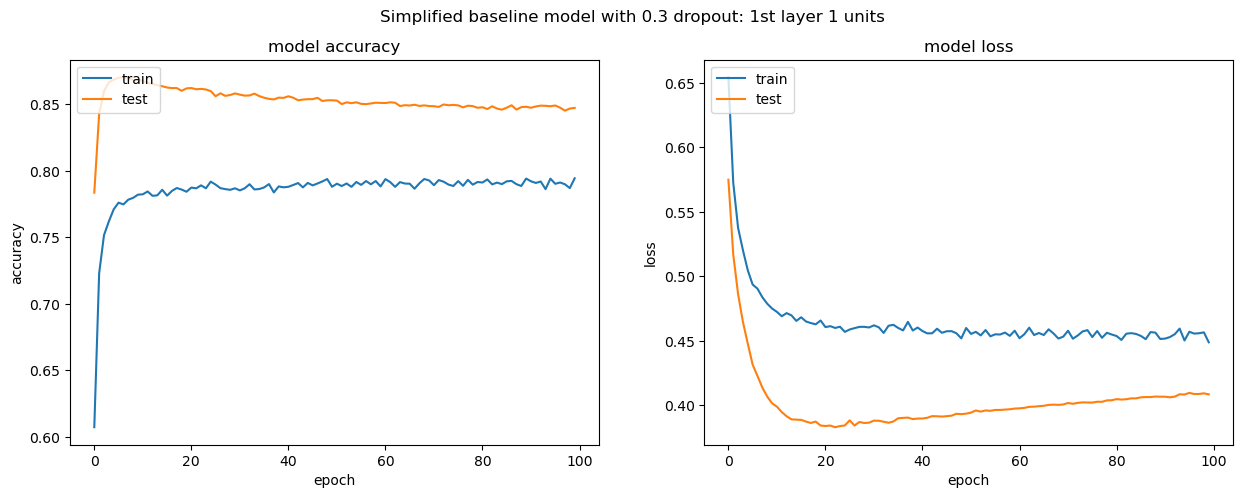

Best val accuracy: 0.8702800273895264 at epoch 6
Final Validation loss: 0.4085480868816376 Validation accuracy: 0.8471999764442444


In [31]:
def dropout_model():
    model = models.Sequential()
    model.add(layers.Dense(1, activation='relu', input_shape=(num_top_words,)))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(1, activation='sigmoid'))

    return model

model = Model(model_factory=dropout_model)
model.train(x_train, y_train, x_val, y_val, epochs=100, batch_size=256, learning_rate=0.001)
model.plot('Simplified baseline model with 0.3 dropout: 1st layer 1 units')
model.print_best_epoch()
model.evaluate(x_val, y_val);

Very simple model and dropout ... Interesting results, High level of dropout with not so much neurons prevent model from having good train results, but during validation, when the dropdout is turned off out model performs not so bad... but still overfitting is present

### Regularization + dropdout

Epoch 1/100
98/98 - 1s - loss: 1.0106 - accuracy: 0.6312 - val_loss: 0.6395 - val_accuracy: 0.8398
Epoch 2/100
98/98 - 0s - loss: 0.6470 - accuracy: 0.7786 - val_loss: 0.5426 - val_accuracy: 0.8541
Epoch 3/100
98/98 - 0s - loss: 0.6040 - accuracy: 0.8099 - val_loss: 0.5298 - val_accuracy: 0.8596
Epoch 4/100
98/98 - 0s - loss: 0.5937 - accuracy: 0.8187 - val_loss: 0.5235 - val_accuracy: 0.8618
Epoch 5/100
98/98 - 0s - loss: 0.5901 - accuracy: 0.8218 - val_loss: 0.5195 - val_accuracy: 0.8648
Epoch 6/100
98/98 - 0s - loss: 0.5916 - accuracy: 0.8235 - val_loss: 0.5121 - val_accuracy: 0.8690
Epoch 7/100
98/98 - 0s - loss: 0.5832 - accuracy: 0.8290 - val_loss: 0.5235 - val_accuracy: 0.8659
Epoch 8/100
98/98 - 0s - loss: 0.5833 - accuracy: 0.8286 - val_loss: 0.5116 - val_accuracy: 0.8669
Epoch 9/100
98/98 - 0s - loss: 0.5812 - accuracy: 0.8315 - val_loss: 0.5057 - val_accuracy: 0.8704
Epoch 10/100
98/98 - 0s - loss: 0.5764 - accuracy: 0.8317 - val_loss: 0.5075 - val_accuracy: 0.8686
Epoch 11/

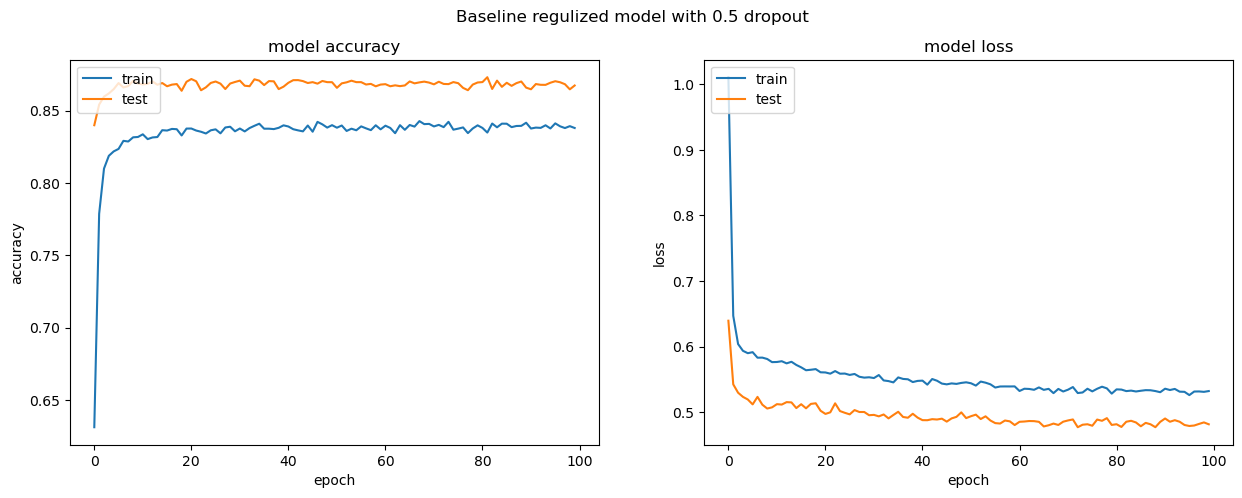

Best val accuracy: 0.8730000257492065 at epoch 81
Final Validation loss: 0.48171862959861755 Validation accuracy: 0.8672800064086914


In [33]:
def regulized_dropout_model():
    model = models.Sequential()
    model.add(layers.Dense(16, kernel_regularizer=keras.regularizers.l1(0.001), activation='relu', input_shape=(num_top_words,)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(8, kernel_regularizer=keras.regularizers.l1(0.001), activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1, activation='sigmoid'))

    return model

model = Model(model_factory=regulized_dropout_model)
model.train(x_train, y_train, x_val, y_val, epochs=100, batch_size=256, learning_rate=0.001)
model.plot('Baseline regulized model with 0.5 dropout')
model.print_best_epoch()
model.evaluate(x_val, y_val);

There we try baseline model with regularization and dropout, and we get good results.

Epoch 1/100
98/98 - 1s - loss: 0.9170 - accuracy: 0.7338 - val_loss: 0.5766 - val_accuracy: 0.8508
Epoch 2/100
98/98 - 0s - loss: 0.5604 - accuracy: 0.8266 - val_loss: 0.5105 - val_accuracy: 0.8540
Epoch 3/100
98/98 - 0s - loss: 0.5280 - accuracy: 0.8355 - val_loss: 0.4953 - val_accuracy: 0.8555
Epoch 4/100
98/98 - 0s - loss: 0.5190 - accuracy: 0.8370 - val_loss: 0.4879 - val_accuracy: 0.8562
Epoch 5/100
98/98 - 0s - loss: 0.5132 - accuracy: 0.8392 - val_loss: 0.4839 - val_accuracy: 0.8585
Epoch 6/100
98/98 - 0s - loss: 0.5105 - accuracy: 0.8414 - val_loss: 0.4813 - val_accuracy: 0.8586
Epoch 7/100
98/98 - 0s - loss: 0.5089 - accuracy: 0.8428 - val_loss: 0.4846 - val_accuracy: 0.8583
Epoch 8/100
98/98 - 0s - loss: 0.5038 - accuracy: 0.8460 - val_loss: 0.4748 - val_accuracy: 0.8603
Epoch 9/100
98/98 - 0s - loss: 0.5046 - accuracy: 0.8461 - val_loss: 0.4742 - val_accuracy: 0.8620
Epoch 10/100
98/98 - 0s - loss: 0.5001 - accuracy: 0.8473 - val_loss: 0.4709 - val_accuracy: 0.8632
Epoch 11/

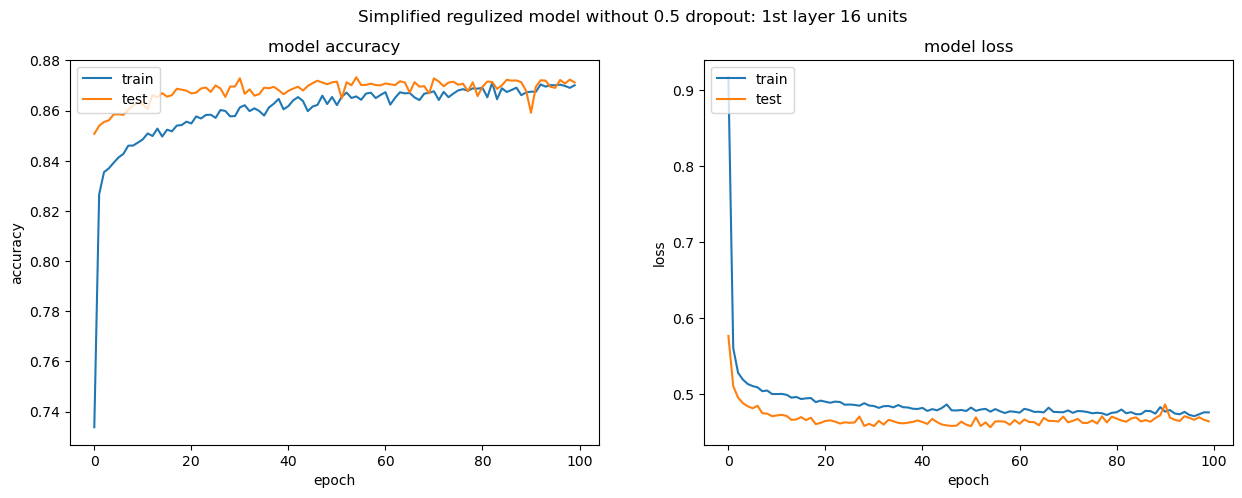

Best val accuracy: 0.8733199834823608 at epoch 54
Final Validation loss: 0.4641425311565399 Validation accuracy: 0.8712400197982788


In [42]:
def regulized_dropout_model():
    model = models.Sequential()
    model.add(layers.Dense(16, kernel_regularizer=keras.regularizers.l1(0.001), activation='relu', input_shape=(num_top_words,)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1, activation='sigmoid'))

    return model

model = Model(model_factory=regulized_dropout_model)
model.train(x_train, y_train, x_val, y_val, epochs=100, batch_size=256, learning_rate=0.001)
model.plot('Simplified regulized model without 0.5 dropout: 1st layer 16 units')
model.print_best_epoch()
model.evaluate(x_val, y_val);

Simplified model with dropout and regularization... so, the results are pretty good, I would peek that model, close predictable results

As we are predicting sentiment there are some interesting advanced topics, like SHAP analysis, that let us to understand impact of particular word on the results. I was partially involved in one such project: https://github.com/Critteros/trump-tweets/tree/main (trump tweets dataset).